## 1. Importing the dependencies

In [ ]:
!pip install catboost


In [ ]:
# Xử lý dữ liệu
import numpy as np
import pandas as pd

# Trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Tiền xử lý dữ liệu
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

# Chia dữ liệu và đánh giá mô hình
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, validation_curve

# Các thuật toán phân loại
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Các thuật toán hồi quy
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Đánh giá mô hình
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, precision_recall_curve,
    mean_squared_error, mean_absolute_error, r2_score
)

# Xử lý cảnh báo
import warnings
warnings.simplefilter(action="ignore")

# Lưu và tải mô hình
import pickle


## 2. Adjusting Row Column Settings

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 3. Data Loading

In [ ]:
# load the csv data to a pandas dataframe
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("/content/Merged_Churn_Dataset.csv")

Saving Merged_Churn_Dataset.csv to Merged_Churn_Dataset.csv


## 4. EDA

In [ ]:
df.shape

(7043, 51)

In [ ]:
df = df.drop(columns=['churn_score', 'churn_label', 'churn_category',
                     'churn_reason', 'customer_status', 'satisfaction_score', 'cltv'])

In [ ]:
df.head()

customer_id  gender  age under_30 senior_citizen partner dependents  number_of_dependents  \
0  0002-ORFBO  Female   37       No             No     Yes         No                     0   
1  0003-MKNFE    Male   46       No             No      No         No                     0   
2  0004-TLHLJ    Male   50       No             No      No         No                     0   
3  0011-IGKFF    Male   78       No            Yes     Yes         No                     0   
4  0013-EXCHZ  Female   75       No            Yes     Yes         No                     0   

  married  tenure internet_service phone_service multiple_lines  avg_monthly_gb_download  \
0     Yes       9              Yes           Yes             No                       16   
1      No       9              Yes           Yes            Yes                       10   
2      No       4              Yes           Yes             No                       30   
3     Yes      13              Yes           Yes             No                        4   
4     Yes       3              Yes           Yes             No                       11   

  unlimited_data    offer referred_a_friend  number_of_referrals online_security online_backup  \
0            Yes      NaN               Yes                    2              No           Yes   
1             No      NaN                No                    0              No            No   
2            Yes  Offer E                No                    0              No            No   
3            Yes  Offer D               Yes                    1              No           Yes   
4            Yes      NaN               Yes                    3              No            No   

  device_protection premium_tech_support streaming_tv streaming_movies streaming_music  \
0                No                  Yes          Yes               No              No   
1                No                   No           No              Yes             Yes   
2               Yes                   No           No               No              No   
3               Yes                   No          Yes              Yes              No   
4                No                  Yes          Yes               No              No   

  internet_type        contract paperless_billing    payment_method  monthly_charges  \
0         Cable        One Year               Yes      Mailed check           65.600   
1         Cable  Month-to-Month                No      Mailed check           59.900   
2   Fiber Optic  Month-to-Month               Yes  Electronic check           73.900   
3   Fiber Optic  Month-to-Month               Yes  Electronic check           98.000   
4   Fiber Optic  Month-to-Month               Yes      Mailed check           83.900   

   avg_monthly_long_distance_charges  total_charges  total_refunds  total_extra_data_charges  \
0                             42.390        593.300          0.000                         0   
1                             10.690        542.400         38.330                        10   
2                             33.650        280.850          0.000                         0   
3                             27.820       1237.850          0.000                         0   
4                              7.380        267.400          0.000                         0   

   total_long_distance_charges  total_revenue  churn_value        country       state  \
0                      381.510        974.810            0  United States  California   
1                       96.210        610.280            0  United States  California   
2                      134.600        415.450            1  United States  California   
3                      361.660       1599.510            1  United States  California   
4                       22.140        289.540            1  United States  California   

           city  zip_code  total_population  latitude  longitude  
0  Frazier Park     93225              4

In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    numeric_df = df.select_dtypes(include='number')

    quantiles = numeric_df.describe([0, 0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1]).T
    print(quantiles)

In [ ]:
check_df(df)

##################### Shape #####################
(7043, 44)
##################### Types #####################
customer_id                           object
gender                                object
age                                    int64
under_30                              object
senior_citizen                        object
partner                               object
dependents                            object
number_of_dependents                   int64
married                               object
tenure                                 int64
internet_service                      object
phone_service                         object
multiple_lines                        object
avg_monthly_gb_download                int64
unlimited_data                        object
offer                                 object
referred_a_friend                     object
number_of_referrals                    int64
online_security                       object
online_backup                     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   under_30                           7043 non-null   object 
 4   senior_citizen                     7043 non-null   object 
 5   partner                            7043 non-null   object 
 6   dependents                         7043 non-null   object 
 7   number_of_dependents               7043 non-null   int64  
 8   married                            7043 non-null   object 
 9   tenure                             7043 non-null   int64  
 10  internet_service                   7043 non-null   object 
 11  phone_service                      7043 non-null   objec

## 5. Fill the missing values

In [ ]:
print(df.isnull().sum())

customer_id                             0
gender                                  0
age                                     0
under_30                                0
senior_citizen                          0
partner                                 0
dependents                              0
number_of_dependents                    0
married                                 0
tenure                                  0
internet_service                        0
phone_service                           0
multiple_lines                          0
avg_monthly_gb_download                 0
unlimited_data                          0
offer                                3877
referred_a_friend                       0
number_of_referrals                     0
online_security                         0
online_backup                           0
device_protection                       0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                  

In [ ]:
df['offer'] = df['offer'].fillna('No Offer')
df['internet_type'] = df['internet_type'].fillna('Unknown')

In [ ]:
print(df.isnull().sum())

customer_id                          0
gender                               0
age                                  0
under_30                             0
senior_citizen                       0
partner                              0
dependents                           0
number_of_dependents                 0
married                              0
tenure                               0
internet_service                     0
phone_service                        0
multiple_lines                       0
avg_monthly_gb_download              0
unlimited_data                       0
offer                                0
referred_a_friend                    0
number_of_referrals                  0
online_security                      0
online_backup                        0
device_protection                    0
premium_tech_support                 0
streaming_tv                         0
streaming_movies                     0
streaming_music                      0
internet_type            

In [ ]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [ ]:
binary_cols

['gender',
 'under_30',
 'senior_citizen',
 'partner',
 'dependents',
 'married',
 'internet_service',
 'phone_service',
 'multiple_lines',
 'unlimited_data',
 'referred_a_friend',
 'online_security',
 'online_backup',
 'device_protection',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'paperless_billing']

In [ ]:
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})

In [ ]:
df.head()

customer_id  gender  age  under_30  senior_citizen  partner  dependents  number_of_dependents  \
0  0002-ORFBO  Female   37         0               0        1           0                     0   
1  0003-MKNFE    Male   46         0               0        0           0                     0   
2  0004-TLHLJ    Male   50         0               0        0           0                     0   
3  0011-IGKFF    Male   78         0               1        1           0                     0   
4  0013-EXCHZ  Female   75         0               1        1           0                     0   

   married  tenure  internet_service  phone_service  multiple_lines  avg_monthly_gb_download  \
0        1       9                 1              1               0                       16   
1        0       9                 1              1               1                       10   
2        0       4                 1              1               0                       30   
3        1      13                 1              1               0                        4   
4        1       3                 1              1               0                       11   

   unlimited_data     offer  referred_a_friend  number_of_referrals  online_security  \
0               1  No Offer                  1                    2                0   
1               0  No Offer                  0                    0                0   
2               1   Offer E                  0                    0                0   
3               1   Offer D                  1                    1                0   
4               1  No Offer                  1                    3                0   

   online_backup  device_protection  premium_tech_support  streaming_tv  streaming_movies  \
0              1                  0                     1             1                 0   
1              0                  0                     0             0                 1   
2              0                  1                     0             0                 0   
3              1                  1                     0             1                 1   
4              0                  0                     1             1                 0   

   streaming_music internet_type        contract  paperless_billing    payment_method  \
0                0         Cable        One Year                  1      Mailed check   
1                1         Cable  Month-to-Month                  0      Mailed check   
2                0   Fiber Optic  Month-to-Month                  1  Electronic check   
3                0   Fiber Optic  Month-to-Month                  1  Electronic check   
4                0   Fiber Optic  Month-to-Month                  1      Mailed check   

   monthly_charges  avg_monthly_long_distance_charges  total_charges  total_refunds  \
0           65.600                             42.390        593.300          0.000   
1           59.900                             10.690        542.400         38.330   
2           73.900                             33.650        280.850          0.000   
3           98.000                             27.820       1237.850          0.000   
4           83.900                              7.380        267.400          0.000   

   total_extra_data_charges  total_long_distance_charges  total_revenue  churn_value  \
0                         0                      381.510        974.810            0   
1                        10                       96.210        610.280            0   
2                         0                      134.600        415.450            1   
3                         0                      361.660       1599.510            1   
4                         0                       22.140        289.540            1   

         country       state          city  zip_code  total_population  latitude  longitude  
0  United States  California  Frazier Park     93225         

## 6. Capturing / Detecting Numeric and Categorical Variables

In [ ]:
# Drop columns state, country

numerical_features_list = ["tenure", "monthly_charges", "total_charges"]

# Loại bỏ các cột có 1 giá trị duy nhất
columns_to_drop = []

for col in df.columns:
    if col not in numerical_features_list:
        # Kiểm tra số lượng giá trị duy nhất trong cột
        if df[col].nunique() == 1:
            columns_to_drop.append(col)

# Loại bỏ các cột có 1 giá trị duy nhất
df = df.drop(columns=columns_to_drop)

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 7043
Variables: 42
cat_cols: 24
num_cols: 16
cat_but_car: 2
num_but_cat: 19


In [ ]:
cat_cols

['gender',
 'offer',
 'internet_type',
 'contract',
 'payment_method',
 'under_30',
 'senior_citizen',
 'partner',
 'dependents',
 'married',
 'internet_service',
 'phone_service',
 'multiple_lines',
 'unlimited_data',
 'referred_a_friend',
 'online_security',
 'online_backup',
 'device_protection',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'paperless_billing',
 'churn_value']

In [ ]:
num_cols

['age',
 'number_of_dependents',
 'tenure',
 'avg_monthly_gb_download',
 'number_of_referrals',
 'monthly_charges',
 'avg_monthly_long_distance_charges',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'zip_code',
 'total_population',
 'latitude',
 'longitude']

In [ ]:
cat_but_car

['customer_id', 'city']

In [ ]:
num_but_cat

['under_30',
 'senior_citizen',
 'partner',
 'dependents',
 'married',
 'internet_service',
 'phone_service',
 'multiple_lines',
 'unlimited_data',
 'referred_a_friend',
 'online_security',
 'online_backup',
 'device_protection',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'paperless_billing',
 'churn_value']

In [ ]:
cat_cols = [col for col in cat_cols if col not in ["churn_value"]]

In [ ]:
cat_cols

['gender',
 'offer',
 'internet_type',
 'contract',
 'payment_method',
 'under_30',
 'senior_citizen',
 'partner',
 'dependents',
 'married',
 'internet_service',
 'phone_service',
 'multiple_lines',
 'unlimited_data',
 'referred_a_friend',
 'online_security',
 'online_backup',
 'device_protection',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'paperless_billing']

## 7. Analysis of Categorical Variables

In [ ]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [ ]:
def cat_summary(dataframe, col_name, plot=False, num_plots=23):

    # In thông tin phân phối của các cột phân loại
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        # Tạo lưới subplot 5 hàng, 3 cột (có thể điều chỉnh nếu cần)
        fig, axes = plt.subplots(6, 4, figsize=(25, 40))  # Tăng kích thước để không bị chồng
        fig.suptitle("Distribution of Categorical Variables", fontsize=24, fontweight="bold")

        # Chuyển axes thành mảng 1 chiều để dễ duyệt
        axes = axes.flatten()

        # Vẽ countplot cho từng cột phân loại
        for i, col in enumerate(cat_cols[:num_plots]):
            sns.countplot(x=dataframe[col], data=dataframe, palette="coolwarm", ax=axes[i])
            axes[i].set_title(f"Countplot of {col}", fontsize=14)
            axes[i].set_xlabel(col, fontsize=12)
            axes[i].set_ylabel("Count", fontsize=12)
            axes[i].tick_params(axis='x', rotation=45)

        # Ẩn các ô trống nếu số biểu đồ ít hơn số subplot
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Điều chỉnh lại layout
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

           longitude  Ratio
longitude                  
-117.300          43  0.611
-116.967          38  0.540
-117.210          36  0.511
-117.199          34  0.483
-117.152          32  0.454
...              ...    ...
-117.090           2  0.028
-117.638           2  0.028
-120.106           2  0.028
-116.224           2  0.028
-119.829           1  0.014

[1625 rows x 2 columns]
##########################################


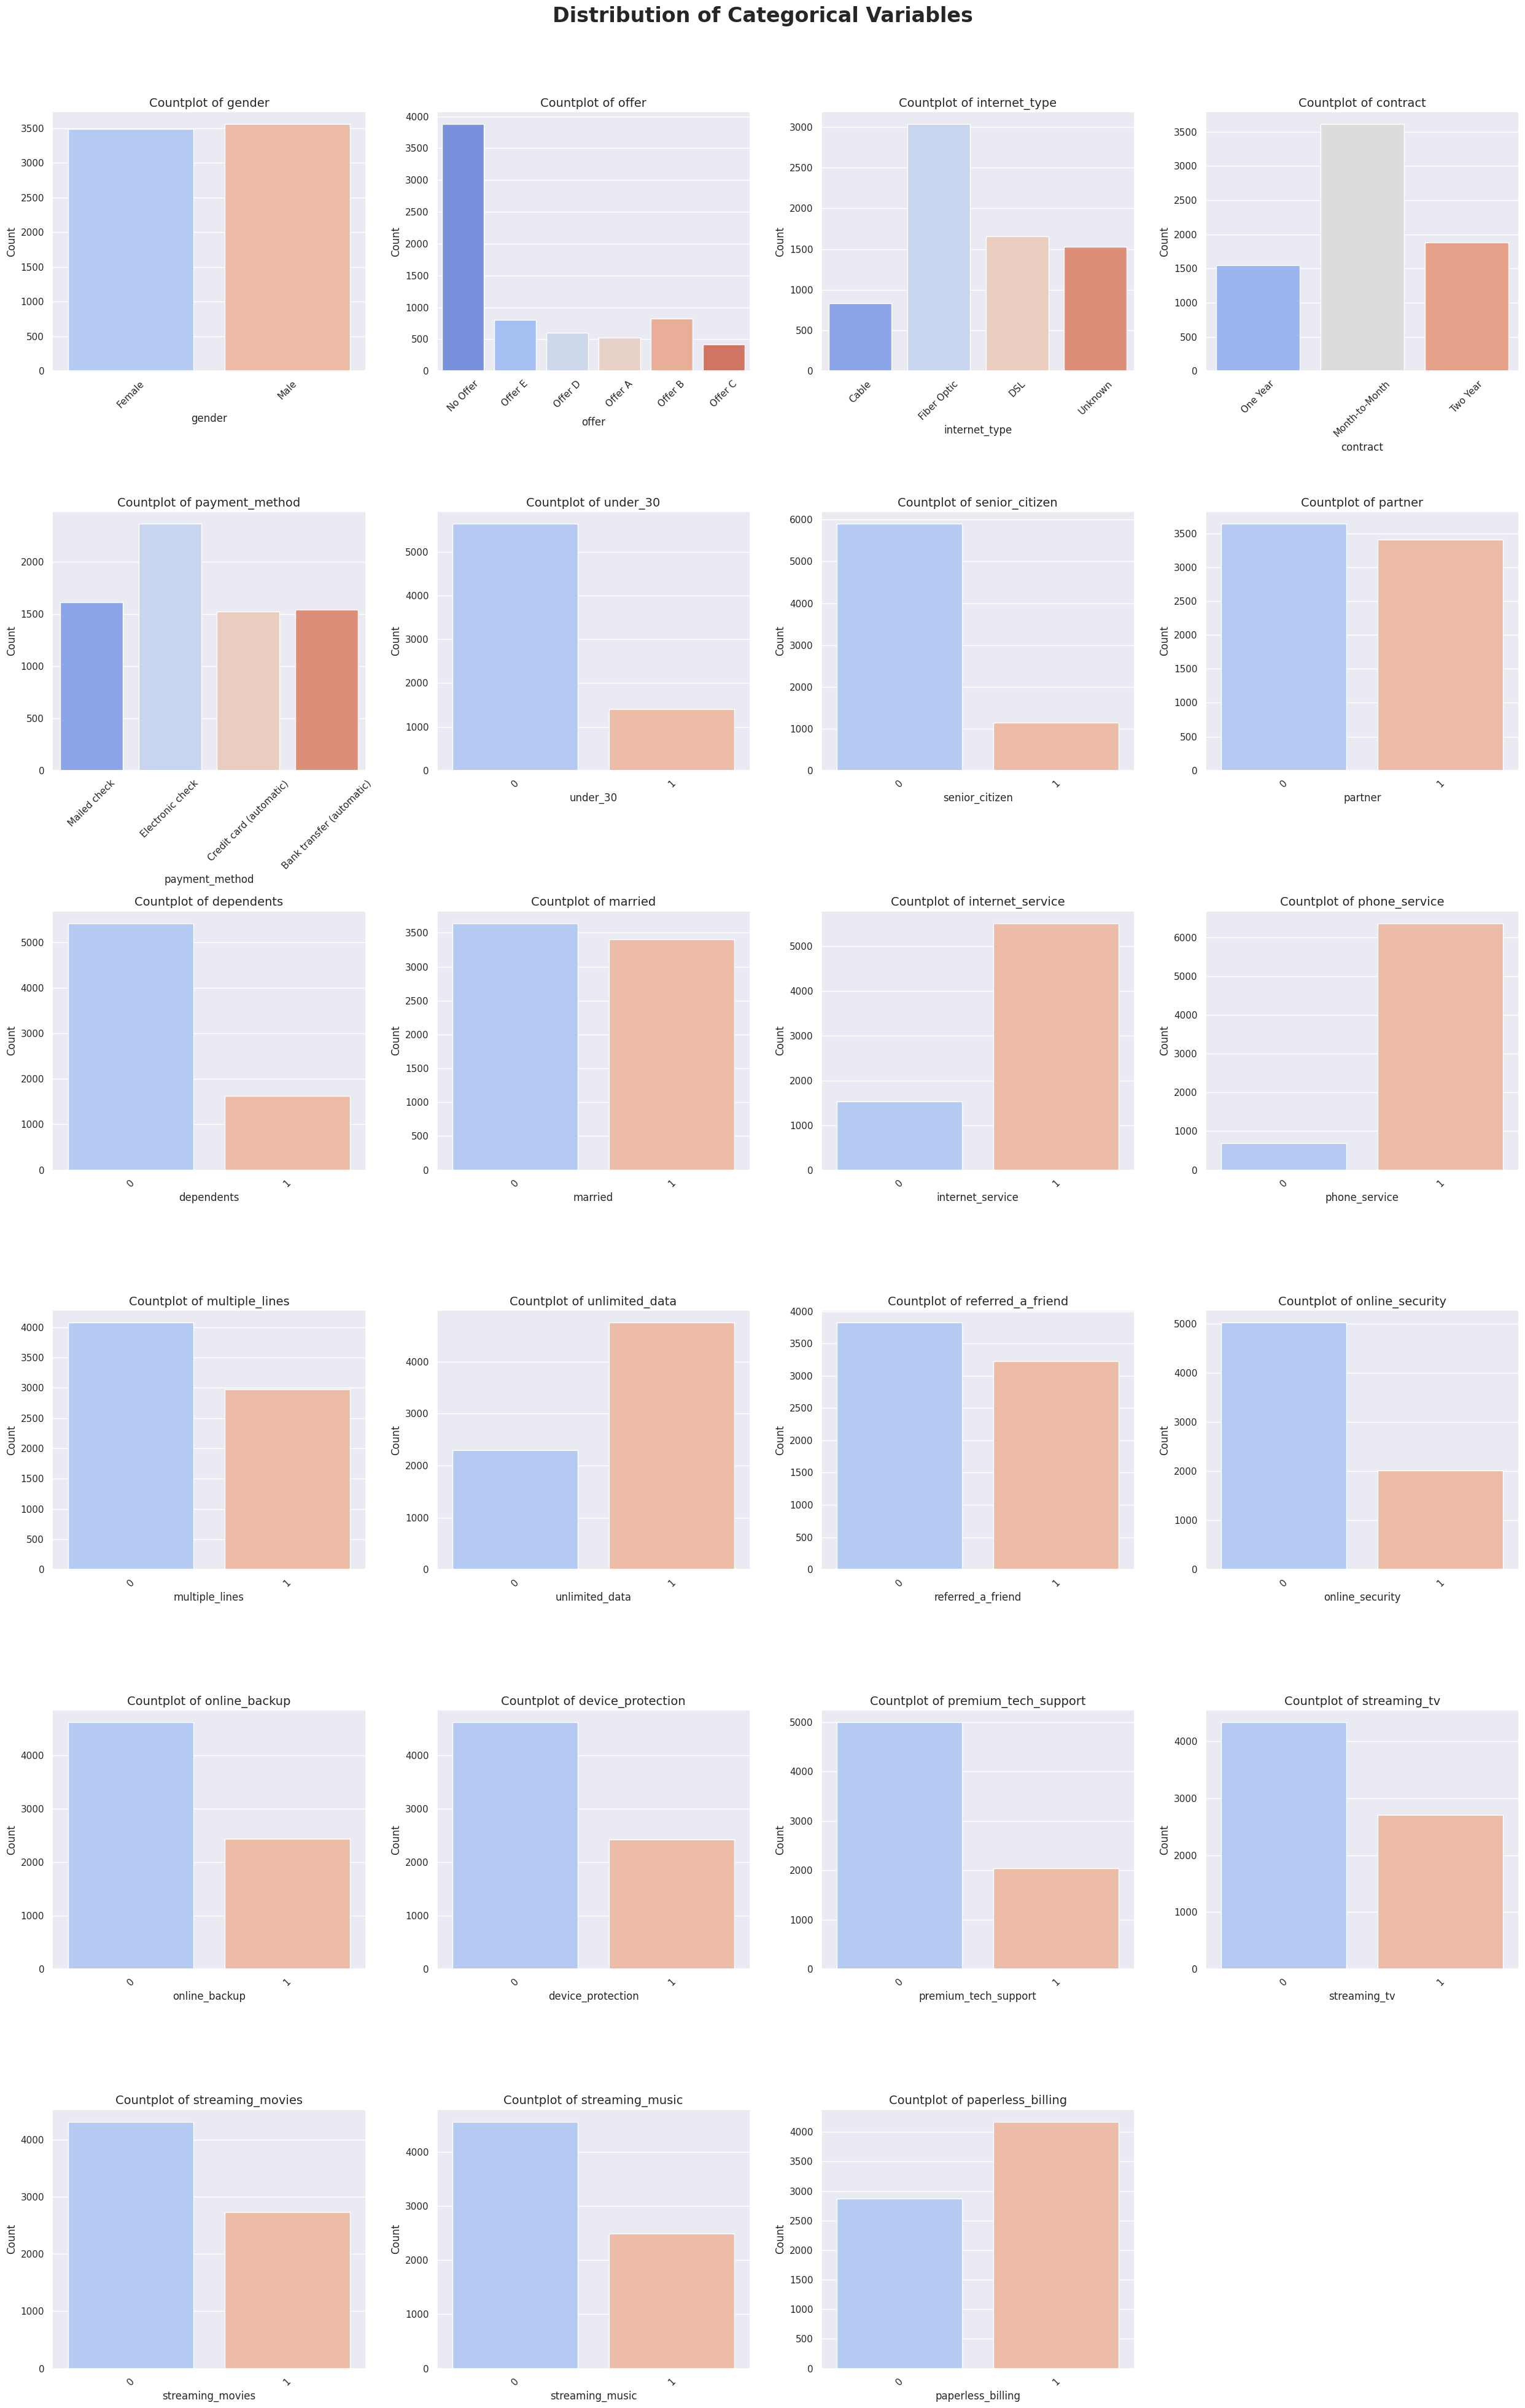

In [ ]:
cat_summary(df, col, plot=True)

## 8. Analysis of Numerical Variables

In [ ]:
def num_summary(dataframe, num_cols, plot=False, num_plots=15):
    """
    Hiển thị mô tả thống kê cho các cột số và vẽ biểu đồ histogram với KDE trong lưới 3x5.

    Args:
    - dataframe: DataFrame chứa dữ liệu.
    - num_cols: Danh sách các cột số muốn phân tích.
    - plot: Boolean, nếu True sẽ vẽ biểu đồ histogram và kde.
    - num_plots: Số lượng biểu đồ muốn vẽ trong lưới (mặc định là 15).
    """

    # Hiển thị thống kê mô tả cho các cột
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    for col in num_cols:
        print(f"Summary statistics for {col}:")
        print(dataframe[col].describe(quantiles).T)
        print("##########################################")

    # Nếu plot=True, vẽ biểu đồ
    if plot:
        # Tạo lưới subplot 5 hàng, 3 cột
        fig, axes = plt.subplots(5, 3, figsize=(18, 20))  # Tăng kích thước để không bị chồng
        fig.suptitle("Distribution of Numerical Variables", fontsize=18, fontweight="bold")

        # Chuyển axes thành mảng 1 chiều để dễ duyệt
        axes = axes.flatten()

        # Vẽ biểu đồ histogram và KDE cho các cột số
        for i, col in enumerate(num_cols[:num_plots]):
            sns.histplot(dataframe[col], bins=30, kde=True, ax=axes[i], color="royalblue")
            axes[i].set_title(f"Histogram of {col}", fontsize=14)
            axes[i].set_xlabel("Value")
            axes[i].set_ylabel("Frequency")

        # Ẩn các ô trống nếu số biểu đồ ít hơn số subplot
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Điều chỉnh lại layout
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()




Summary statistics for age:
count   7043.000
mean      46.510
std       16.750
min       19.000
5%        21.000
10%       24.000
20%       30.000
30%       35.000
40%       40.800
50%       46.000
60%       51.000
70%       57.000
80%       62.000
90%       71.000
95%       75.000
99%       79.000
max       80.000
Name: age, dtype: float64
##########################################
Summary statistics for number_of_dependents:
count   7043.000
mean       0.469
std        0.963
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        1.000
90%        2.000
95%        3.000
99%        3.000
max        9.000
Name: number_of_dependents, dtype: float64
##########################################
Summary statistics for tenure:
count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       

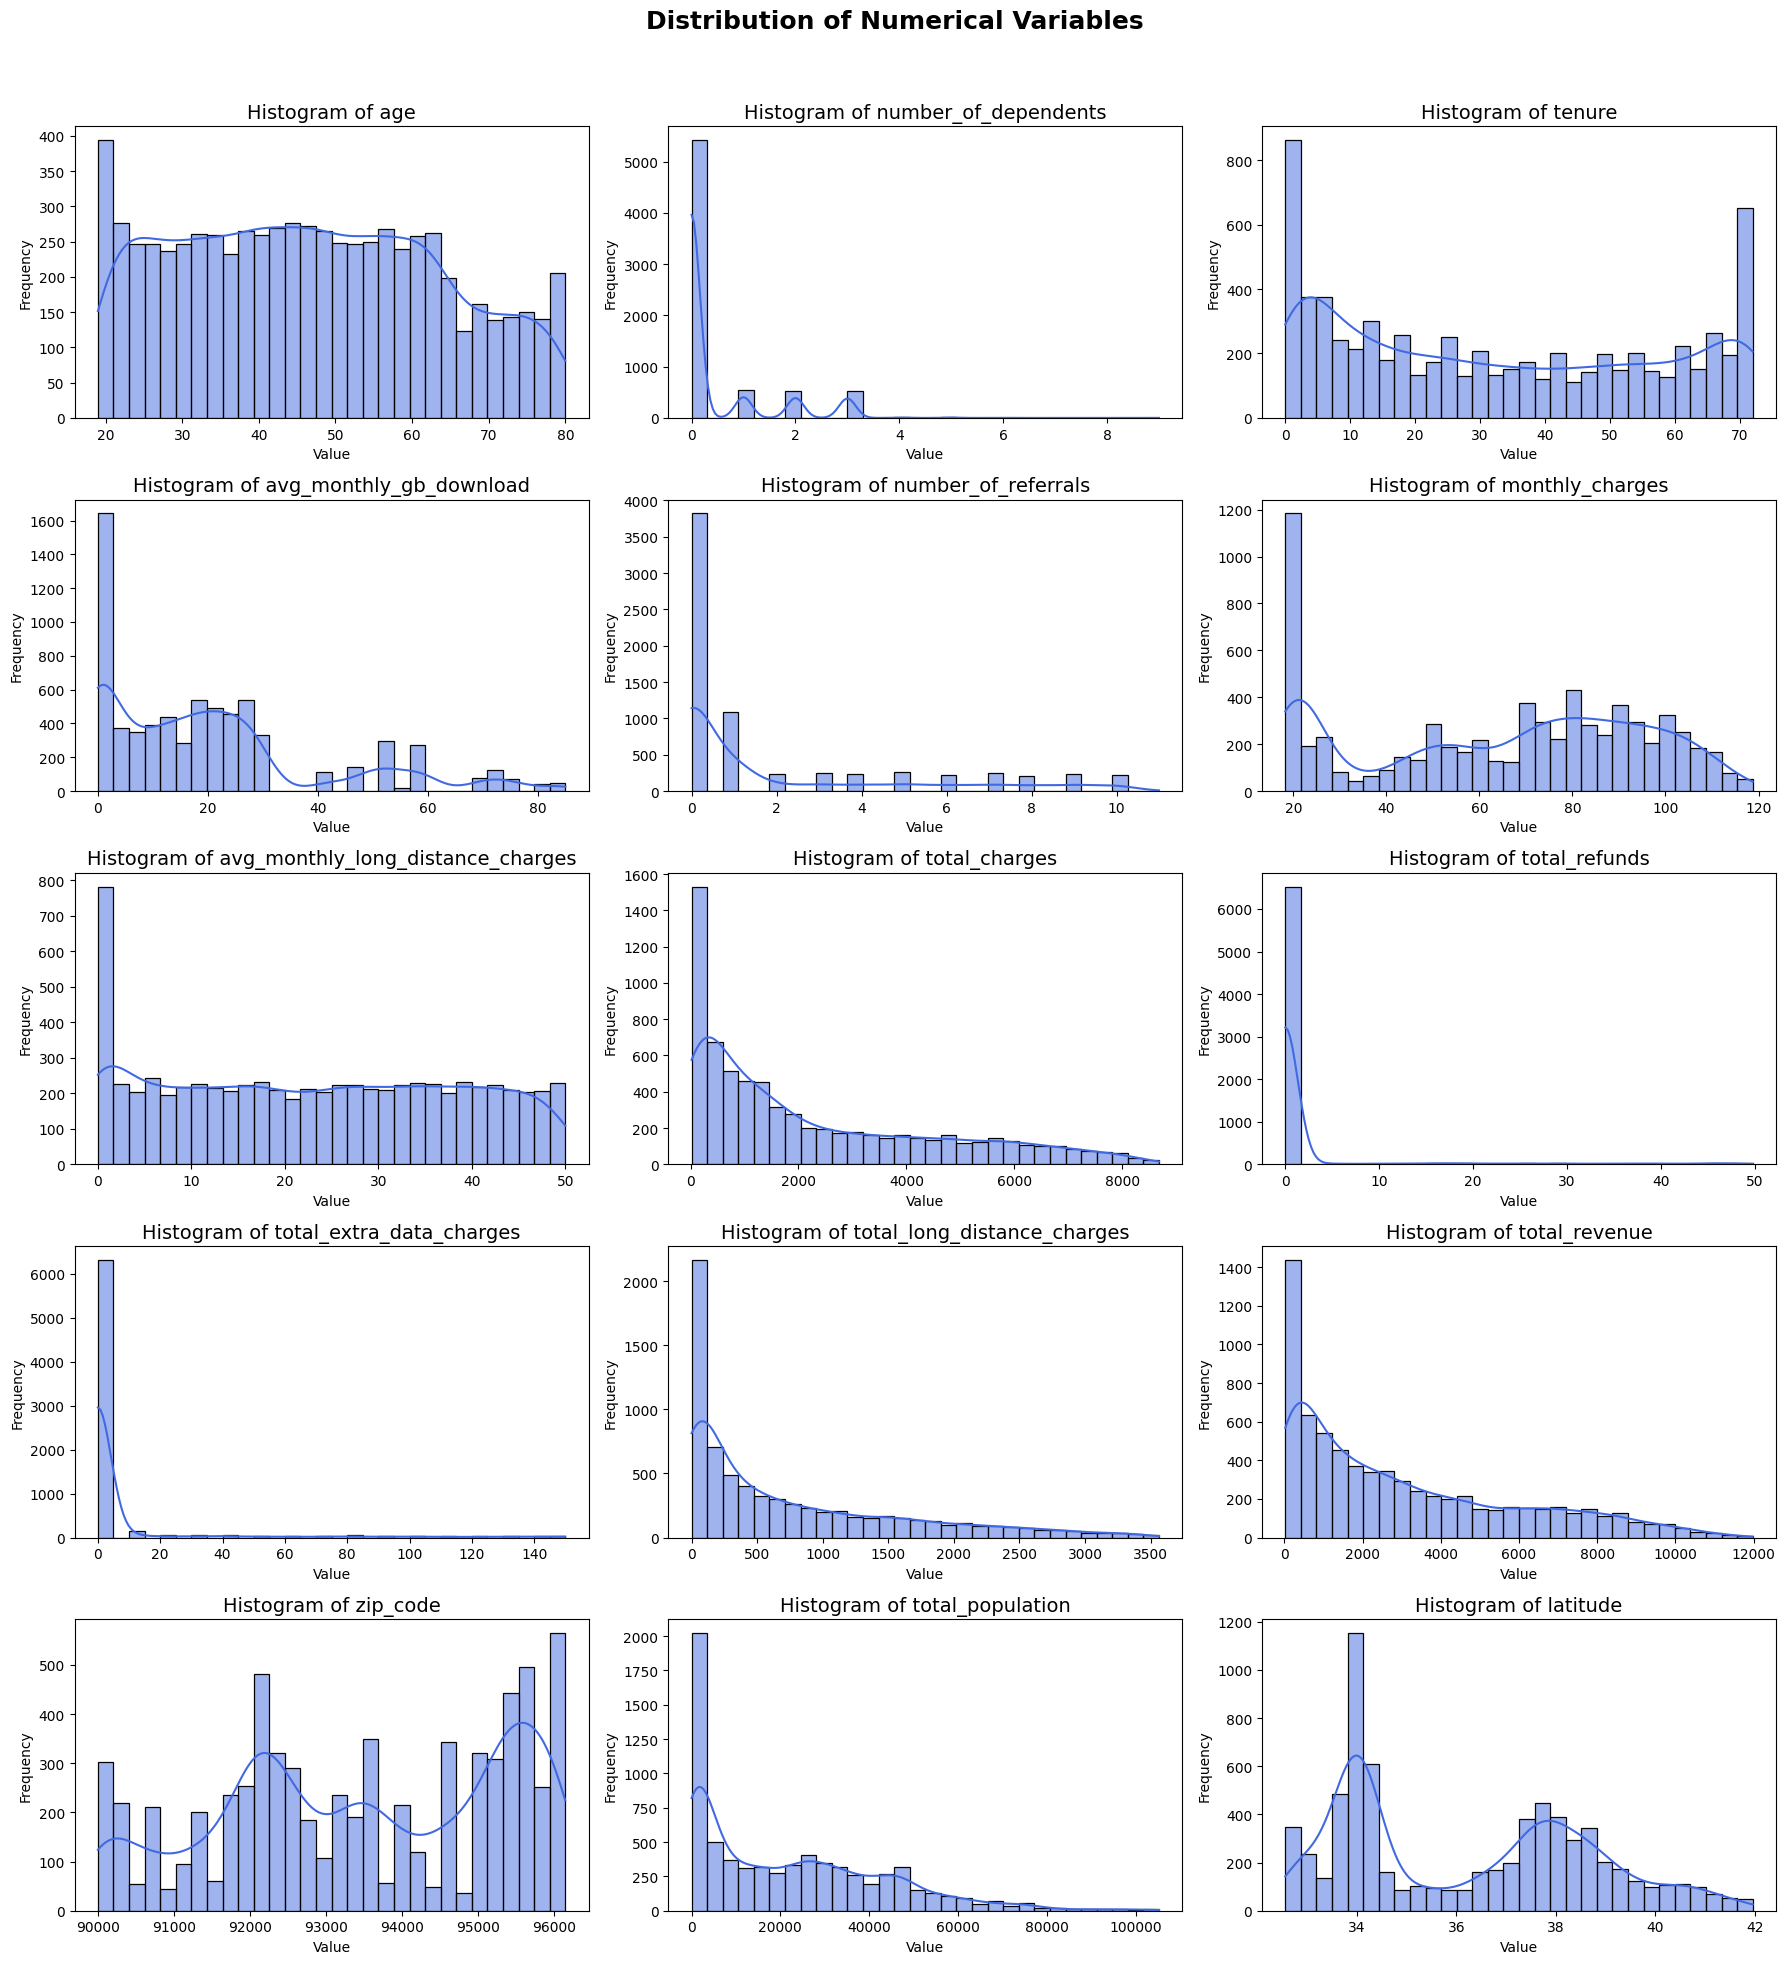

In [ ]:
num_summary(df, num_cols, plot=True)

## 9. Analysis of Categorical Variables by Target

In [ ]:
#  Tính tỷ lệ churn trung bình cho mỗi nhóm phân loại trong các cột phân loại +
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe, palette="Set2")
        plt.show(block=True)

In [ ]:
for col in cat_cols:
    target_summary_with_cat(df, "churn_value", col, plot=   False)

        TARGET_MEAN
gender             
Female        0.269
Male          0.262


          TARGET_MEAN
offer                
No Offer        0.271
Offer A         0.067
Offer B         0.123
Offer C         0.229
Offer D         0.267
Offer E         0.529


               TARGET_MEAN
internet_type             
Cable                0.257
DSL                  0.186
Fiber Optic          0.407
Unknown              0.074


                TARGET_MEAN
contract                   
Month-to-Month        0.458
One Year              0.107
Two Year              0.025


                           TARGET_MEAN
payment_method                        
Bank transfer (automatic)        0.167
Credit card (automatic)          0.152
Electronic check                 0.453
Mailed check                     0.191


          TARGET_MEAN
under_30             
0               0.277
1               0.217


                TARGET_MEAN
senior_citizen             
0                     0.236
1                     0.

## 10. Analysis of Numeric Variables by Target

In [ ]:
# tính trung bình của cột số cho các nhóm của biến mục tiêu (churn =1/0)
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

In [ ]:
for col in num_cols:
    target_summary_with_num(df, "churn_value", col, plot=False)

             age_mean
churn_value          
0              45.344
1              49.736


             number_of_dependents_mean
churn_value                           
0                                0.595
1                                0.118


             tenure_mean
churn_value             
0                 37.570
1                 17.979


             avg_monthly_gb_download_mean
churn_value                              
0                                  19.916
1                                  22.175


             number_of_referrals_mean
churn_value                          
0                               2.469
1                               0.521


             monthly_charges_mean
churn_value                      
0                          61.265
1                          74.441


             avg_monthly_long_distance_charges_mean
churn_value                                        
0                                            22.884
1                               

## 11. Correlation Analysis

In [ ]:
corr = df[num_cols].corr()

In [ ]:
corr

age  number_of_dependents  tenure  avg_monthly_gb_download  \
age                                1.000                -0.119   0.010                   -0.377   
number_of_dependents              -0.119                 1.000   0.108                    0.130   
tenure                             0.010                 0.108   1.000                    0.049   
avg_monthly_gb_download           -0.377                 0.130   0.049                    1.000   
number_of_referrals               -0.025                 0.278   0.326                    0.039   
monthly_charges                    0.145                -0.132   0.248                    0.392   
avg_monthly_long_distance_charges -0.012                -0.007   0.015                   -0.030   
total_charges                      0.060                 0.023   0.826                    0.223   
total_refunds                      0.024                 0.014   0.059                    0.002   
total_extra_data_charges           0.025                -0.014   0.082                    0.089   
total_long_distance_charges        0.003                 0.069   0.674                    0.011   
total_revenue                      0.048                 0.038   0.853                    0.181   
zip_code                          -0.008                 0.016   0.007                   -0.011   
total_population                  -0.019                -0.015  -0.012                    0.025   
latitude                          -0.010                 0.029   0.012                   -0.028   
longitude                          0.008                -0.024  -0.010                    0.031   

                                   number_of_referrals  monthly_charges  \
age                                             -0.025            0.145   
number_of_dependents                             0.278           -0.132   
tenure                                           0.326            0.248   
avg_monthly_gb_download                          0.039            0.392   
number_of_referrals                              1.000            0.028   
monthly_charges                                  0.028            1.000   
avg_monthly_long_distance_charges                0.006            0.138   
total_charges                                    0.250            0.651   
total_refunds                                    0.025            0.033   
total_extra_data_charges                         0.000            0.126   
total_long_distance_charges                      0.216            0.246   
total_revenue                                    0.262            0.589   
zip_code                                         0.001           -0.011   
total_population                                -0.008            0.010   
latitude                                         0.019           -0.030   
longitude                                       -0.010            0.028   

                                   avg_monthly_long_distance_charges  total_charges  \
age                                                           -0.012          0.060   
number_of_dependents                                          -0.007          0.023   
tenure                                                         0.015          0.826   
avg_monthly_gb_download                                       -0.030          0.223   
number_of_referrals                                            0.006          0.250   
monthly_charges                                                0.138          0.651   
avg_monthly_long_distance_charges                              1.000          0.070   
total_charges                                                  0.070          1.000   
total_refunds                                                 -0.019          0.040   
total_extra_data_charges                                       0.002          0.122   
total_long_distance_charges                                    0.600          0.610   
total_revenue                    

In [ ]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.80):
    # Chỉ lấy các cột số
    numeric_df = dataframe.select_dtypes(include=[np.number])

    # Tính ma trận tương quan
    corr = numeric_df.corr()

    # Lấy ma trận tam giác trên (để loại bỏ các bản sao không cần thiết)
    upper_triangle_matrix = np.triu(np.ones(corr.shape), k=1)

    # Tạo mask cho heatmap, chỉ giữ lại các giá trị tương quan cao hơn ngưỡng
    mask = np.abs(corr) < corr_th

    # Lọc các cột có độ tương quan cao hơn ngưỡng
    high_corrs = [(col, row)
                  for col in corr.columns
                  for row in corr.index
                  if mask.loc[row, col] and abs(corr.loc[row, col]) > corr_th]

    # Nếu plot=True, vẽ Heatmap
    if plot:
        plt.figure(figsize=(15, 10))  # Điều chỉnh kích thước biểu đồ cho đẹp
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8},
                    linewidths=0.5, cbar_kws={'shrink': 0.75}, mask=upper_triangle_matrix, center=0)
        plt.title(f"Correlation Heat Map (Threshold > {corr_th})", fontsize=16)
        plt.xticks(rotation=45, ha="right", fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
        plt.tight_layout()  # Đảm bảo các nhãn không bị chồng lên nhau
        plt.show()

    return high_corrs


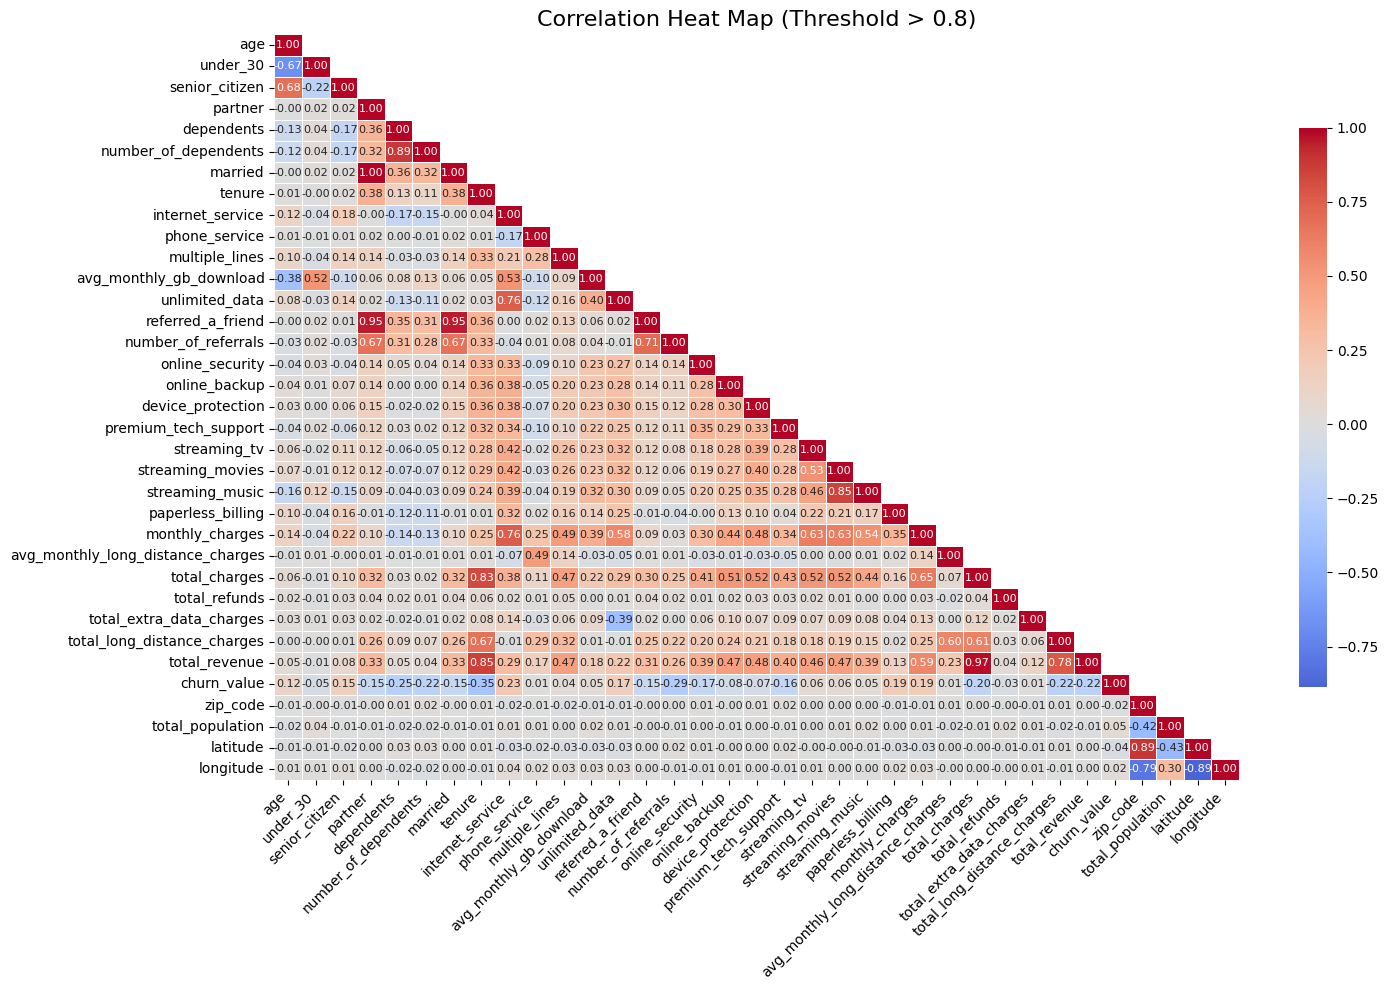

[]

In [ ]:
high_correlated_cols(df, plot=True)

## 12. Feature Reduction

In [ ]:
def generate_correlation_relationships(df, numeric_columns, threshold=0.95):
    """
    Tính toán ma trận tương quan và lọc các cặp có độ tương quan cao hơn ngưỡng.

    Args:
    - df: DataFrame chứa dữ liệu.
    - numeric_columns: Danh sách các cột số trong DataFrame.
    - threshold: Ngưỡng độ tương quan để lọc các cặp feature (mặc định là 0.95).

    Returns:
    - correlation_relationships: DataFrame chứa các cặp feature có độ tương quan cao hơn ngưỡng.
    """
    # Tính ma trận tương quan
    corr_matrix = df[numeric_columns].corr().abs()

    # Tạo cặp tương quan
    correlation_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            correlation_value = corr_matrix.iloc[i, j]

            # Lọc các cặp có độ tương quan lớn hơn ngưỡng
            if correlation_value >= threshold:
                correlation_pairs.append({
                    'Feature1': feature1,
                    'Feature2': feature2,
                    'Correlation': correlation_value
                })

    # Chuyển thành DataFrame và sắp xếp theo độ mạnh tương quan
    correlation_relationships = pd.DataFrame(correlation_pairs)
    correlation_relationships = correlation_relationships.sort_values(
        'Correlation', ascending=False
    )

    return correlation_relationships

# Giả sử bạn có một DataFrame df và danh sách các cột số num_cols
numeric_columns = df.select_dtypes(include='number').columns.tolist()  # Lấy các cột số, bao gồm cả cột phân loại chuyển thành số
correlation_df = generate_correlation_relationships(df, numeric_columns, 0.94)

# Hiển thị kết quả
correlation_df


Feature1           Feature2  Correlation
0        partner            married        1.000
3  total_charges      total_revenue        0.972
1        partner  referred_a_friend        0.950
2        married  referred_a_friend        0.950

In [ ]:
correlation_df = correlation_df.sort_values(by=['Feature1', 'Correlation'], ascending=[True, False])

correlation_df

Feature1           Feature2  Correlation
2        married  referred_a_friend        0.950
0        partner            married        1.000
1        partner  referred_a_friend        0.950
3  total_charges      total_revenue        0.972

In [ ]:
df = df.drop(columns=correlation_df["Feature2"].unique())

In [ ]:
num_cols = [col for col in num_cols if col not in correlation_df["Feature2"].unique()]

In [ ]:
num_cols

['age',
 'number_of_dependents',
 'tenure',
 'avg_monthly_gb_download',
 'number_of_referrals',
 'monthly_charges',
 'avg_monthly_long_distance_charges',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'zip_code',
 'total_population',
 'latitude',
 'longitude']

In [ ]:
num_but_cat = [col for col in num_but_cat if col not in correlation_df["Feature2"].unique()]

In [ ]:
num_but_cat

['under_30',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'phone_service',
 'multiple_lines',
 'unlimited_data',
 'online_security',
 'online_backup',
 'device_protection',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'paperless_billing',
 'churn_value']

In [ ]:
cat_cols = [col for col in cat_cols if col not in correlation_df["Feature2"].unique()]

In [ ]:
cat_cols

['gender',
 'offer',
 'internet_type',
 'contract',
 'payment_method',
 'under_30',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'phone_service',
 'multiple_lines',
 'unlimited_data',
 'online_security',
 'online_backup',
 'device_protection',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'paperless_billing']

## 13. Distribution of the Dependent Variable

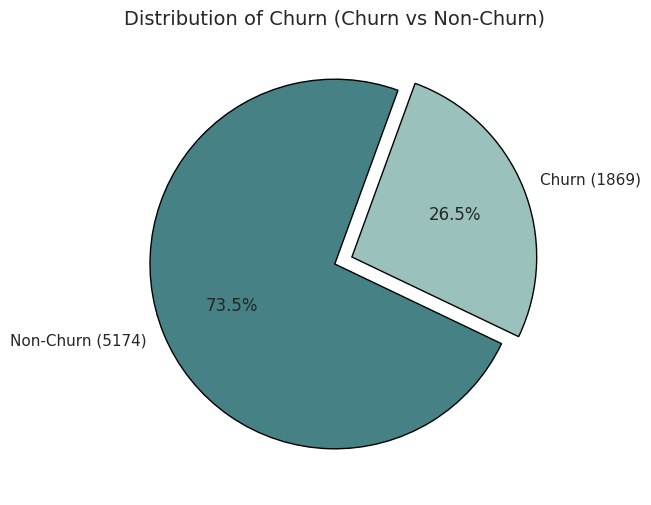

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

outcome_counts = df['churn_value'].value_counts()


total_customers = outcome_counts.sum()


percentages = outcome_counts / total_customers * 100


labels = [f'Non-Churn ({outcome_counts[0]})',
          f'Churn ({outcome_counts[1]})']

colors = ['#468186', '#9BC1BC'] #colors = ["#ED6B5A", "#91A776", "#9BC1BC", "#F6F4CA", "#468186"]
explode = [0, 0.1]

plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', colors=colors,
        explode=explode, startangle=70, wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Churn (Churn vs Non-Churn)', fontsize=14)

plt.show()


## 14. Outlier Analysis

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

age False
number_of_dependents True
tenure False
avg_monthly_gb_download True
number_of_referrals True
monthly_charges False
avg_monthly_long_distance_charges False
total_charges False
total_refunds True
total_extra_data_charges True
total_long_distance_charges True
zip_code False
total_population True
latitude False
longitude False


**Insights:**

##### Outlier: number_of_refferals, number_of_dependents, avg_monthly_gb_download, total_refunds, total_extra_data_charges, total_long_distance_charges, total_population

**Todo:**
Standardizing data using RobustScaler


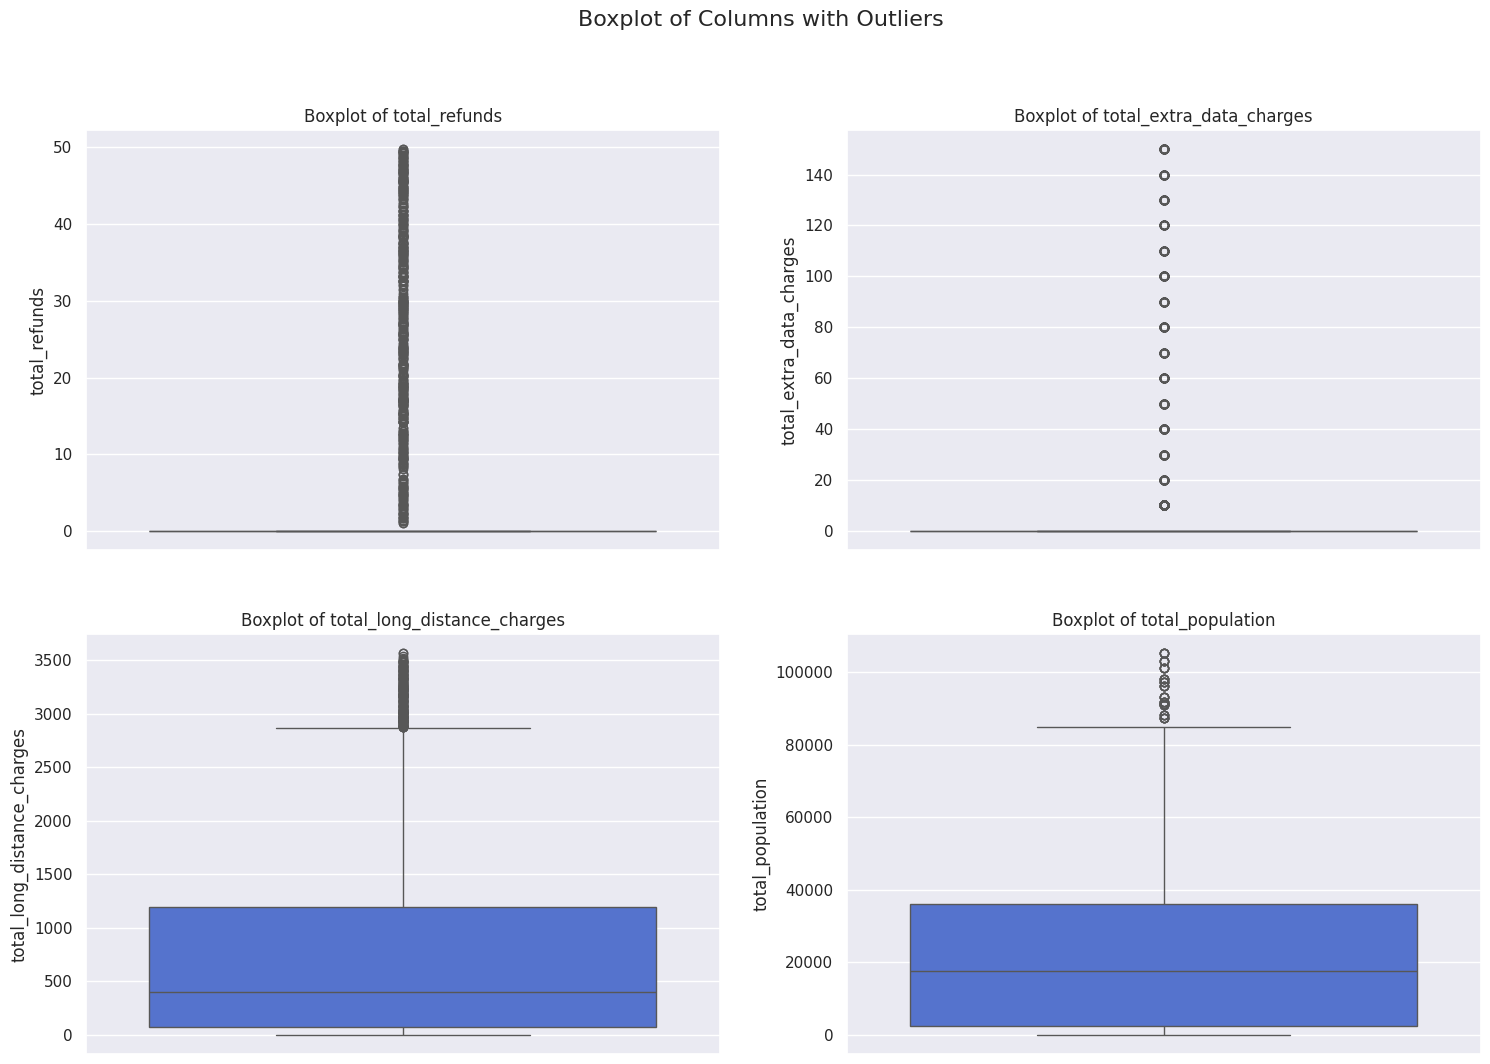

In [ ]:
# Import thư viện vẽ
import seaborn as sns
import matplotlib.pyplot as plt


outlier_columns = [
    "total_refunds", "total_extra_data_charges", "total_long_distance_charges", "total_population"
]

# Vẽ boxplot cho các cột có outlier
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Boxplot of Columns with Outliers", fontsize=16)

# Chuyển đổi axes thành danh sách để duyệt
axes = axes.flatten()

# Vẽ từng boxplot
for i, col in enumerate(outlier_columns):
    sns.boxplot(y=df[col], ax=axes[i], color="royalblue")
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout(rect=[0, 0, 1, 0])
plt.show()


## 15. Base Model

In [ ]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["churn_value"]]

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
dff = one_hot_encoder(dff, cat_cols)

In [ ]:
dff.head()

customer_id  age  number_of_dependents  tenure  avg_monthly_gb_download  number_of_referrals  \
0  0002-ORFBO   37                     0       9                       16                    2   
1  0003-MKNFE   46                     0       9                       10                    0   
2  0004-TLHLJ   50                     0       4                       30                    0   
3  0011-IGKFF   78                     0      13                        4                    1   
4  0013-EXCHZ   75                     0       3                       11                    3   

   monthly_charges  avg_monthly_long_distance_charges  total_charges  total_refunds  \
0           65.600                             42.390        593.300          0.000   
1           59.900                             10.690        542.400         38.330   
2           73.900                             33.650        280.850          0.000   
3           98.000                             27.820       1237.850          0.000   
4           83.900                              7.380        267.400          0.000   

   total_extra_data_charges  total_long_distance_charges  churn_value          city  zip_code  \
0                         0                      381.510            0  Frazier Park     93225   
1                        10                       96.210            0      Glendale     91206   
2                         0                      134.600            1    Costa Mesa     92627   
3                         0                      361.660            1      Martinez     94553   
4                         0                       22.140            1     Camarillo     93010   

   total_population  latitude  longitude  gender_Female  gender_Male  offer_No Offer  \
0              4498    34.828   -118.999           True        False            True   
1             31297    34.163   -118.204          False         True            True   
2             62069    33.646   -117.923          False         True           False   
3             46677    38.014   -122.115          False         True           False   
4             42853    34.228   -119.080           True        False            True   

   offer_Offer A  offer_Offer B  offer_Offer C  offer_Offer D  offer_Offer E  internet_type_Cable  \
0          False          False          False          False          False                 True   
1          False          False          False          False          False                 True   
2          False          False          False          False           True                False   
3          False          False          False           True          False                False   
4          False          False          False          False          False                False   

   internet_type_DSL  internet_type_Fiber Optic  internet_type_Unknown  contract_Month-to-Month  \
0              False                      False                  False                    False   
1              False                      False                  False                     True   
2              False                       True                  False                     True   
3              False                       True                  False                     True   
4              False                       True                  False                     True   

   contract_One Year  contract_Two Year  payment_method_Bank transfer (automatic)  \
0               True              False                                     False   
1              False              False                                     False   
2              False              False                                     False   
3              False              False                                     False   
4              False              False                                     False   

   payment_method_Credit card (automatic)  payment_method_Electro

In [ ]:
cat_cols

['gender',
 'offer',
 'internet_type',
 'contract',
 'payment_method',
 'under_30',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'phone_service',
 'multiple_lines',
 'unlimited_data',
 'online_security',
 'online_backup',
 'device_protection',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'paperless_billing']

In [ ]:
scaler = RobustScaler()

In [ ]:
dff[num_cols] = scaler.fit_transform(dff[num_cols])

In [ ]:
label_encoder = LabelEncoder()
dff["city"] = label_encoder.fit_transform(dff["city"])

In [ ]:
dff.head()

customer_id    age  number_of_dependents  tenure  avg_monthly_gb_download  number_of_referrals  \
0  0002-ORFBO -0.321                 0.000  -0.435                   -0.042                0.667   
1  0003-MKNFE  0.000                 0.000  -0.435                   -0.292                0.000   
2  0004-TLHLJ  0.143                 0.000  -0.543                    0.542                0.000   
3  0011-IGKFF  1.143                 0.000  -0.348                   -0.542                0.333   
4  0013-EXCHZ  1.036                 0.000  -0.565                   -0.250                1.000   

   monthly_charges  avg_monthly_long_distance_charges  total_charges  total_refunds  \
0           -0.087                              0.717         -0.237          0.000   
1           -0.192                             -0.449         -0.252         38.330   
2            0.065                              0.396         -0.329          0.000   
3            0.509                              0.181         -0.046          0.000   
4            0.249                             -0.571         -0.333          0.000   

   total_extra_data_charges  total_long_distance_charges  churn_value  city  zip_code  \
0                     0.000                       -0.018            0   346    -0.091   
1                    10.000                       -0.272            0   368    -0.716   
2                     0.000                       -0.238            1   222    -0.276   
3                     0.000                       -0.036            1   587     0.321   
4                     0.000                       -0.338            1   139    -0.157   

   total_population  latitude  longitude  gender_Female  gender_Male  offer_No Offer  \
0            -0.386    -0.330      0.156           True        False            True   
1             0.407    -0.490      0.364          False         True            True   
2             1.318    -0.614      0.438          False         True           False   
3             0.862     0.434     -0.660          False         True           False   
4             0.749    -0.474      0.135           True        False            True   

   offer_Offer A  offer_Offer B  offer_Offer C  offer_Offer D  offer_Offer E  internet_type_Cable  \
0          False          False          False          False          False                 True   
1          False          False          False          False          False                 True   
2          False          False          False          False           True                False   
3          False          False          False           True          False                False   
4          False          False          False          False          False                False   

   internet_type_DSL  internet_type_Fiber Optic  internet_type_Unknown  contract_Month-to-Month  \
0              False                      False                  False                    False   
1              False                      False                  False                     True   
2              False                       True                  False                     True   
3              False                       True                  False                     True   
4              False                       True                  False                     True   

   contract_One Year  contract_Two Year  payment_method_Bank transfer (automatic)  \
0               True              False                                     False   
1              False              False                                     False   
2              False              False                                     False   
3              False              False                                     False   
4              False              False                                     False   

   payment_method_Credit card (automatic)  payment_method_Electronic check  \
0                      

In [ ]:
y = dff["churn_value"]
# Creating Independent Variables.

X = dff.drop(["churn_value", "customer_id"], axis=1)

In [ ]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(verbose=-1, random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

base_models_metrics = []

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)

    base_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"########## {name} ##########")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

########## LR ##########
Accuracy: 0.838
AUC: 0.8877
Recall: 0.6447
Precision: 0.7164
F1: 0.6785
########## KNN ##########
Accuracy: 0.7328
AUC: 0.7143
Recall: 0.4371
Precision: 0.4956
F1: 0.4642
########## CART ##########
Accuracy: 0.7848
AUC: 0.7274
Recall: 0.6051
Precision: 0.5921
F1: 0.5984
########## RF ##########
Accuracy: 0.8424
AUC: 0.8992
Recall: 0.6159
Precision: 0.7456
F1: 0.6745
########## XGB ##########
Accuracy: 0.8427
AUC: 0.903
Recall: 0.6517
Precision: 0.7271
F1: 0.6872
########## LightGBM ##########
Accuracy: 0.8521
AUC: 0.9098
Recall: 0.6693
Precision: 0.747
F1: 0.706
########## CatBoost ##########
Accuracy: 0.858
AUC: 0.9165
Recall: 0.6667
Precision: 0.7676
F1: 0.7136


## 16. Comparison of Metrics for Different Models Before Feature Engineering

In [ ]:
metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [base_models_metrics[0]['Accuracy'], base_models_metrics[1]['Accuracy'],
                 base_models_metrics[2]['Accuracy'], base_models_metrics[3]['Accuracy'],
                 base_models_metrics[4]['Accuracy'], base_models_metrics[5]['Accuracy'],
                 base_models_metrics[6]['Accuracy']],
    "AUC": [base_models_metrics[0]['AUC'], base_models_metrics[1]['AUC'],
            base_models_metrics[2]['AUC'], base_models_metrics[3]['AUC'],
            base_models_metrics[4]['AUC'], base_models_metrics[5]['AUC'],
            base_models_metrics[6]['AUC']],
    "Recall": [base_models_metrics[0]['Recall'], base_models_metrics[1]['Recall'],
               base_models_metrics[2]['Recall'], base_models_metrics[3]['Recall'],
               base_models_metrics[4]['Recall'], base_models_metrics[5]['Recall'],
               base_models_metrics[6]['Recall']],
    "Precision": [base_models_metrics[0]['Precision'], base_models_metrics[1]['Precision'],
                  base_models_metrics[2]['Precision'], base_models_metrics[3]['Precision'],
                  base_models_metrics[4]['Precision'], base_models_metrics[5]['Precision'],
                  base_models_metrics[6]['Precision']],
    "F1": [base_models_metrics[0]['F1'], base_models_metrics[1]['F1'],
           base_models_metrics[2]['F1'], base_models_metrics[3]['F1'],
           base_models_metrics[4]['F1'], base_models_metrics[5]['F1'],
           base_models_metrics[6]['F1']]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

colors = ["#ED6B5A", "#91A776", "#9BC1BC", "#F6F4CA", "#468186"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models Before Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

## 17. Feature Importance For Base Model

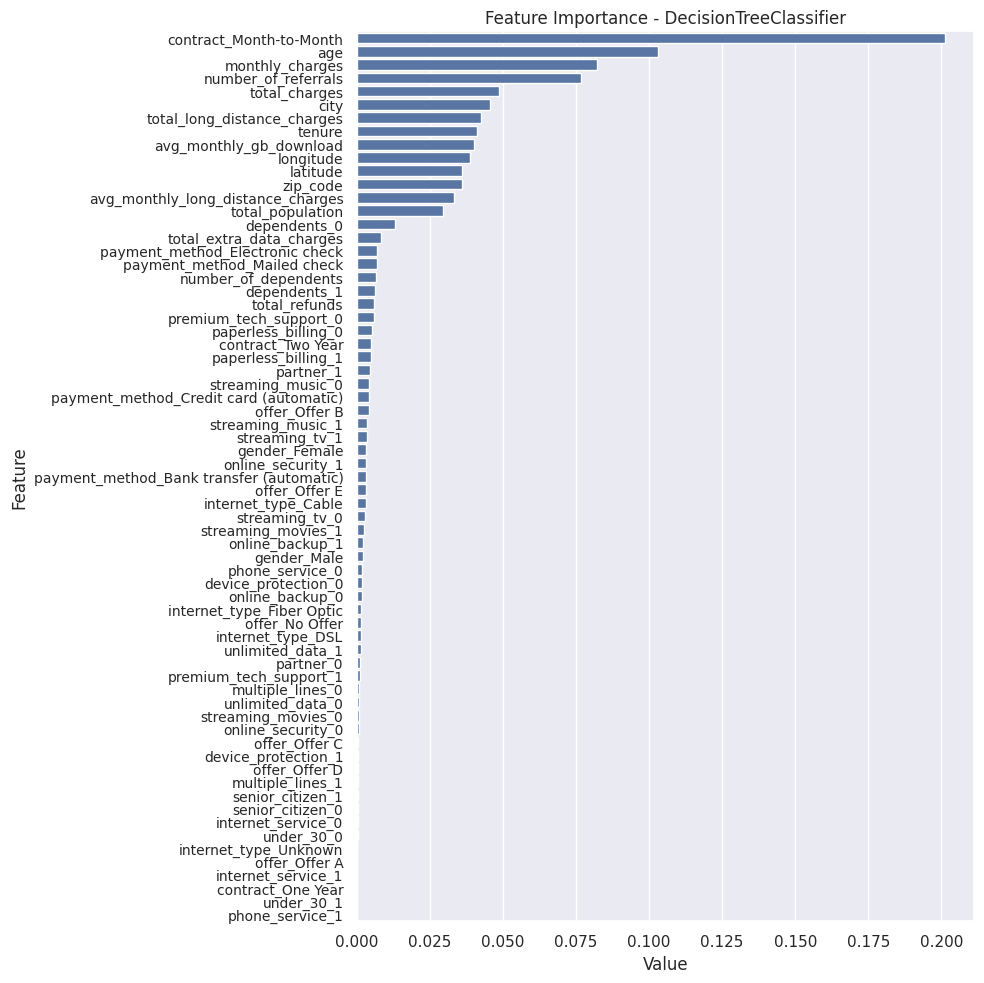

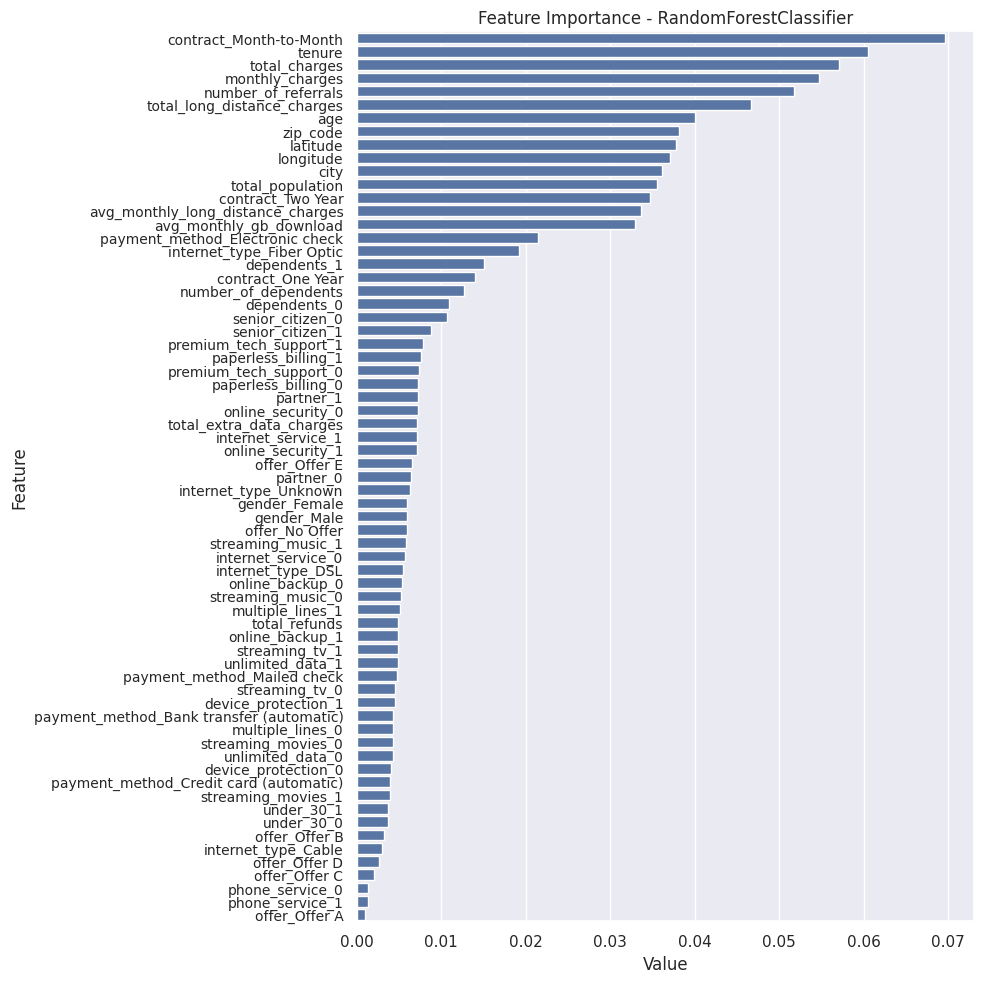

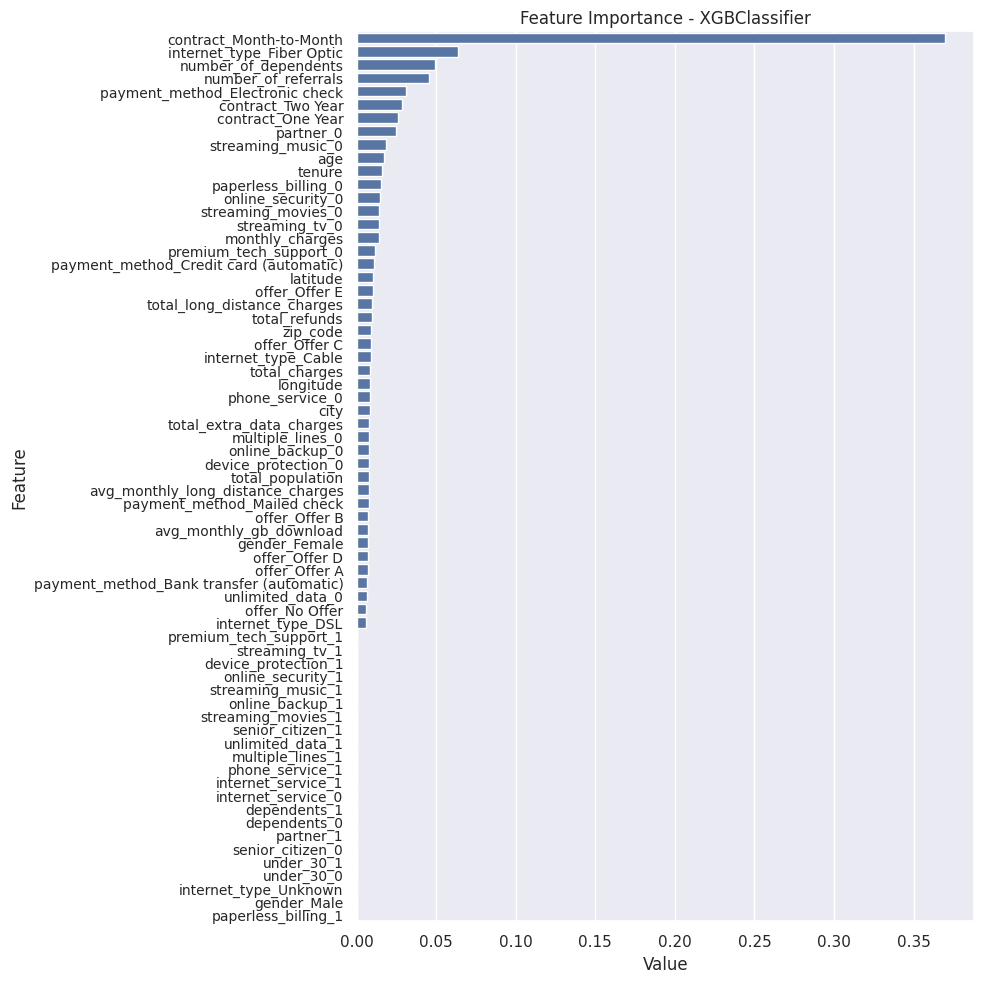

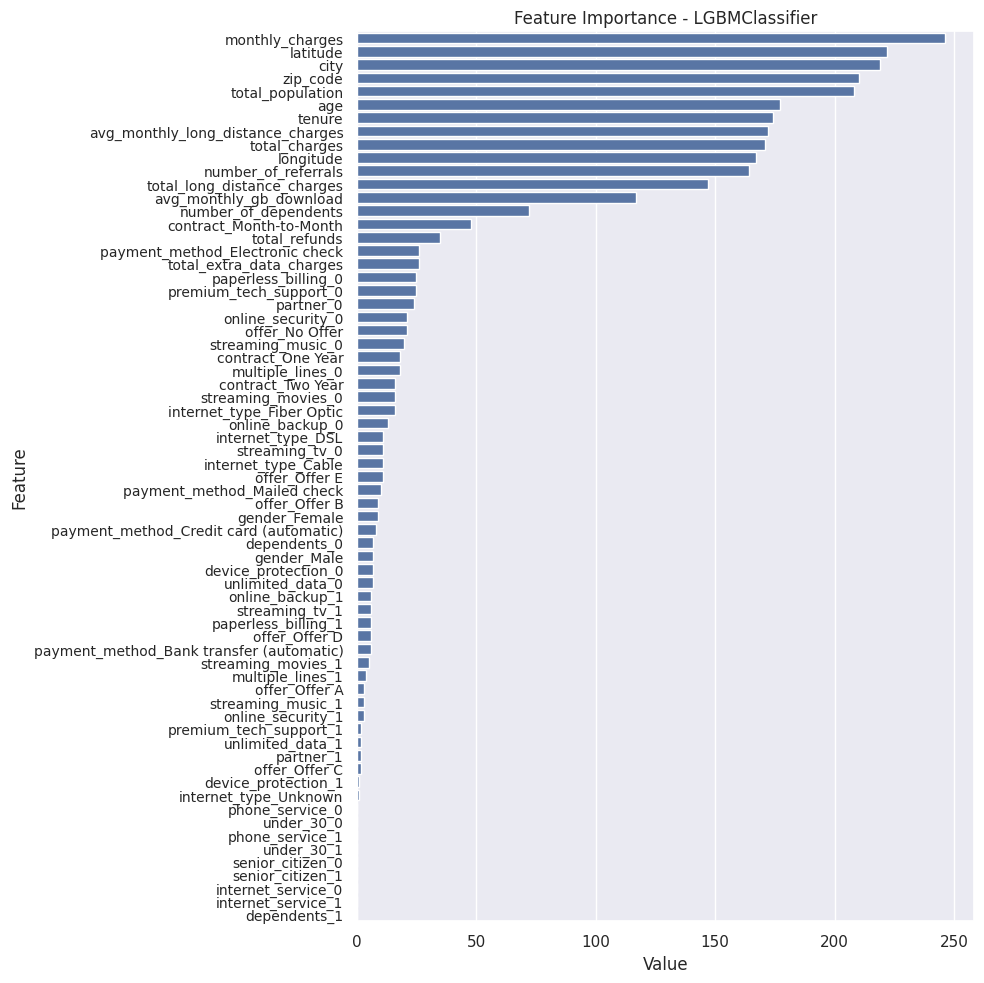

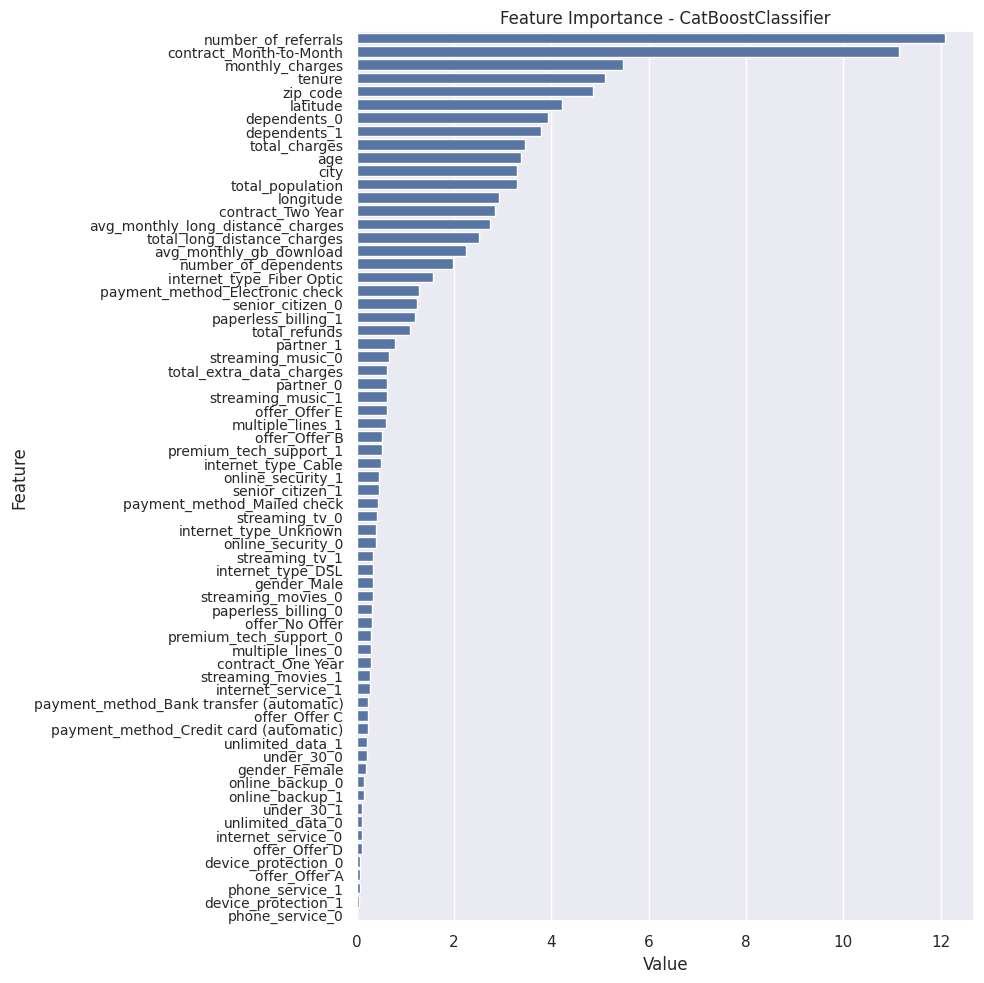

In [ ]:
models = [DecisionTreeClassifier(random_state=12345),
         RandomForestClassifier(random_state=12345),
         XGBClassifier(random_state=12345),
         LGBMClassifier(verbose=-1, random_state=12345),
         CatBoostClassifier(verbose=False, random_state=12345)]

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})

    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)  # Điều chỉnh kích thước font chữ

    # Vẽ biểu đồ thanh
    ax = sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])

    plt.title(f'Feature Importance - {model.__class__.__name__}')

    # Tăng khoảng cách giữa các nhãn bằng cách điều chỉnh khoảng cách trên trục y
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)  # Tăng kích thước font chữ của nhãn y
    ax.set_yticks(range(len(feature_imp)))  # Đảm bảo các tick trên trục y cách nhau đồng đều

    plt.tight_layout()
    plt.show(block=True)

    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')

# Huấn luyện mô hình và vẽ biểu đồ feature importance
for model in models:
    model.fit(X, y)
    plot_importance(model, X)


## 18. Feature Extraction

In [ ]:
df

customer_id  gender  age  under_30  senior_citizen  partner  dependents  \
0     0002-ORFBO  Female   37         0               0        1           0   
1     0003-MKNFE    Male   46         0               0        0           0   
2     0004-TLHLJ    Male   50         0               0        0           0   
3     0011-IGKFF    Male   78         0               1        1           0   
4     0013-EXCHZ  Female   75         0               1        1           0   
...          ...     ...  ...       ...             ...      ...         ...   
7038  9987-LUTYD  Female   20         1               0        0           0   
7039  9992-RRAMN    Male   40         0               0        1           0   
7040  9992-UJOEL    Male   22         1               0        0           0   
7041  9993-LHIEB    Male   21         1               0        1           0   
7042  9995-HOTOH    Male   36         0               0        1           0   

      number_of_dependents  tenure  internet_service  phone_service  multiple_lines  \
0                        0       9                 1              1               0   
1                        0       9                 1              1               1   
2                        0       4                 1              1               0   
3                        0      13                 1              1               0   
4                        0       3                 1              1               0   
...                    ...     ...               ...            ...             ...   
7038                     0      13                 1              1               0   
7039                     0      22                 1              1               1   
7040                     0       2                 1              1               0   
7041                     0      67                 1              1               0   
7042                     0      63                 1              0               0   

      avg_monthly_gb_download  unlimited_data     offer  number_of_referrals  online_security  \
0                          16               1  No Offer                    2                0   
1                          10               0  No Offer                    0                0   
2                          30               1   Offer E                    0                0   
3                           4               1   Offer D                    1                0   
4                          11               1  No Offer                    3                0   
...                       ...             ...       ...                  ...              ...   
7038                       59               1   Offer D                    0                1   
7039                       17               1   Offer D                    1                0   
7040                       51               1   Offer E                    0                0   
7041                       58               1   Offer A                    5                1   
7042                        5               1  No Offer                    1                1   

      online_backup  device_protection  premium_tech_support  streaming_tv  streaming_movies  \
0                 1                  0                     1             1                 0   
1                 0                  0                     0             0                 1   
2                 0                  1                     0             0                 0   
3                 1                  1                     0             1                 1   
4                 0                  0                     1             1                 0   
...             ...                ...                   ...           ...               ...   
7038              0                  0                     1             0                 0   
7039              0                  0                     0      

In [ ]:
# Phân chia thời gian theo năm
bins = [0, 12, 24, 36, 48, 60, 72]
labels = [1, 2, 3, 4, 5, 6]
df["New_tenure_year"] = pd.cut(df["tenure"], bins=bins, labels=labels, right=True)

In [ ]:
# 0 1 2
df["New_contract_type"] = df["contract"].apply(
    lambda x: 2 if x == "Two Year" else (1 if x == "One Year" else 0))

In [ ]:
# Hợp đồng cho những người trẻ month to month
# df["New_young_monthly_contract"] = df.apply(lambda x: 1 if (x["New_contract_type"] == 0) and (x["senior_citizen"] == 0) else 0, axis=1)

In [ ]:
# Số người trong gia đình
df["New_family_size"] = df["partner"] + df["dependents"] + 1

In [ ]:
# Tổng số dịch vụ mà khách hàng đang sử dụng
df['New_total_services'] = (df[['online_security', 'online_backup', 'device_protection', 'premium_tech_support',
                                       'streaming_tv', 'streaming_movies', 'streaming_music']]== 'Yes').sum(axis=1) \
                                        + df["internet_service"] + df["phone_service"]

In [ ]:
# Khách hàng có sử dụng dịch vụ tự động hay không
df["New_flag_auto_payment"] = df["payment_method"].apply(lambda x: 1 if
                                                       x in ["Bank transfer (automatic)","Credit card (automatic)"]
                                                       else 0)

In [ ]:
#df["New_avg_charges"] = df["total_charges"] / df["tenure"]

In [ ]:
#df["New_increase"] = df["New_avg_charges"] / df["monthly_charges"]

In [ ]:
# Fee per service

df["New_avg_service_fee"] = df.apply(
    lambda x: x["monthly_charges"] / (x["New_total_services"] if x["New_total_services"] > 0 else 1),
    axis=1
)

In [ ]:
# People who do not receive any support, backup or protection

df["New_no_protection"] = df.apply(lambda x: 1 if (x["online_backup"] != "Yes") or (x["device_protection"] != "Yes") or (x["premium_tech_support"] != "Yes") else 0, axis=1)

In [ ]:
df["New_urban_flag"] = df["total_population"].apply(lambda x: 1 if x > 50000 else 0)


In [ ]:
df.head()

customer_id  gender  age  under_30  senior_citizen  partner  dependents  number_of_dependents  \
0  0002-ORFBO  Female   37         0               0        1           0                     0   
1  0003-MKNFE    Male   46         0               0        0           0                     0   
2  0004-TLHLJ    Male   50         0               0        0           0                     0   
3  0011-IGKFF    Male   78         0               1        1           0                     0   
4  0013-EXCHZ  Female   75         0               1        1           0                     0   

   tenure  internet_service  phone_service  multiple_lines  avg_monthly_gb_download  \
0       9                 1              1               0                       16   
1       9                 1              1               1                       10   
2       4                 1              1               0                       30   
3      13                 1              1               0                        4   
4       3                 1              1               0                       11   

   unlimited_data     offer  number_of_referrals  online_security  online_backup  \
0               1  No Offer                    2                0              1   
1               0  No Offer                    0                0              0   
2               1   Offer E                    0                0              0   
3               1   Offer D                    1                0              1   
4               1  No Offer                    3                0              0   

   device_protection  premium_tech_support  streaming_tv  streaming_movies  streaming_music  \
0                  0                     1             1                 0                0   
1                  0                     0             0                 1                1   
2                  1                     0             0                 0                0   
3                  1                     0             1                 1                0   
4                  0                     1             1                 0                0   

  internet_type        contract  paperless_billing    payment_method  monthly_charges  \
0         Cable        One Year                  1      Mailed check           65.600   
1         Cable  Month-to-Month                  0      Mailed check           59.900   
2   Fiber Optic  Month-to-Month                  1  Electronic check           73.900   
3   Fiber Optic  Month-to-Month                  1  Electronic check           98.000   
4   Fiber Optic  Month-to-Month                  1      Mailed check           83.900   

   avg_monthly_long_distance_charges  total_charges  total_refunds  total_extra_data_charges  \
0                             42.390        593.300          0.000                         0   
1                             10.690        542.400         38.330                        10   
2                             33.650        280.850          0.000                         0   
3                             27.820       1237.850          0.000                         0   
4                              7.380        267.400          0.000                         0   

   total_long_distance_charges  churn_value          city  zip_code  total_population  latitude  \
0                      381.510            0  Frazier Park     93225              4498    34.828   
1                       96.210            0      Glendale     91206             31297    34.163   
2                      134.600            1    Costa Mesa     92627             62069    33.646   
3                      361.660            1      Martinez     94553             46677    38.014   
4                       22.140            1     Camarillo     93010             42853    34.228   

   longitude New_tenure_year  New_contract_type  New_family_size  New_total_services  \
0   -118.999 

## 19. ENCODING

In [ ]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 7043
Variables: 46
cat_cols: 28
num_cols: 16
cat_but_car: 2
num_but_cat: 23


In [ ]:
cat_cols

['gender',
 'offer',
 'internet_type',
 'contract',
 'payment_method',
 'under_30',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'phone_service',
 'multiple_lines',
 'unlimited_data',
 'online_security',
 'online_backup',
 'device_protection',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'paperless_billing',
 'churn_value',
 'New_tenure_year',
 'New_contract_type',
 'New_family_size',
 'New_total_services',
 'New_flag_auto_payment',
 'New_no_protection']

In [ ]:
num_cols

['age',
 'number_of_dependents',
 'tenure',
 'avg_monthly_gb_download',
 'number_of_referrals',
 'monthly_charges',
 'avg_monthly_long_distance_charges',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'zip_code',
 'total_population',
 'latitude',
 'longitude',
 'New_avg_service_fee']

In [ ]:
cat_but_car

['customer_id', 'city']

In [ ]:
num_but_cat

['under_30',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'phone_service',
 'multiple_lines',
 'unlimited_data',
 'online_security',
 'online_backup',
 'device_protection',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'paperless_billing',
 'churn_value',
 'New_tenure_year',
 'New_contract_type',
 'New_family_size',
 'New_total_services',
 'New_flag_auto_payment',
 'New_no_protection']

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [ ]:
binary_cols2 = [col for col in df.columns if df[col].dtypes == "O" or df[col].dtypes == "int" and df[col].nunique() == 2]

In [ ]:
binary_cols2

['customer_id',
 'gender',
 'under_30',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'phone_service',
 'multiple_lines',
 'unlimited_data',
 'offer',
 'online_security',
 'online_backup',
 'device_protection',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'internet_type',
 'contract',
 'paperless_billing',
 'payment_method',
 'churn_value',
 'city',
 'New_total_services',
 'New_flag_auto_payment']

In [ ]:
binary_cols2 = [col for col in binary_cols2 if col != 'customer_id']

In [ ]:
binary_cols2

['gender',
 'under_30',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'phone_service',
 'multiple_lines',
 'unlimited_data',
 'offer',
 'online_security',
 'online_backup',
 'device_protection',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'internet_type',
 'contract',
 'paperless_billing',
 'payment_method',
 'churn_value',
 'city',
 'New_total_services',
 'New_flag_auto_payment']

In [ ]:
for col in binary_cols2:
    df = label_encoder(df, col)

In [ ]:
cat_cols = [col for col in cat_cols if col not in binary_cols2 and col not in ["churn_value", "New_total_services"]]

In [ ]:
cat_cols

['New_tenure_year',
 'New_contract_type',
 'New_family_size',
 'New_no_protection']

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [ ]:
df.head()

customer_id  gender  age  under_30  senior_citizen  partner  dependents  number_of_dependents  \
0  0002-ORFBO       0   37         0               0        1           0                     0   
1  0003-MKNFE       1   46         0               0        0           0                     0   
2  0004-TLHLJ       1   50         0               0        0           0                     0   
3  0011-IGKFF       1   78         0               1        1           0                     0   
4  0013-EXCHZ       0   75         0               1        1           0                     0   

   tenure  internet_service  phone_service  multiple_lines  avg_monthly_gb_download  \
0       9                 1              1               0                       16   
1       9                 1              1               1                       10   
2       4                 1              1               0                       30   
3      13                 1              1               0                        4   
4       3                 1              1               0                       11   

   unlimited_data  offer  number_of_referrals  online_security  online_backup  device_protection  \
0               1      0                    2                0              1                  0   
1               0      0                    0                0              0                  0   
2               1      5                    0                0              0                  1   
3               1      4                    1                0              1                  1   
4               1      0                    3                0              0                  0   

   premium_tech_support  streaming_tv  streaming_movies  streaming_music  internet_type  contract  \
0                     1             1                 0                0              0         1   
1                     0             0                 1                1              0         0   
2                     0             0                 0                0              2         0   
3                     0             1                 1                0              2         0   
4                     1             1                 0                0              2         0   

   paperless_billing  payment_method  monthly_charges  avg_monthly_long_distance_charges  \
0                  1               3           65.600                             42.390   
1                  0               3           59.900                             10.690   
2                  1               2           73.900                             33.650   
3                  1               2           98.000                             27.820   
4                  1               3           83.900                              7.380   

   total_charges  total_refunds  total_extra_data_charges  total_long_distance_charges  \
0        593.300          0.000                         0                      381.510   
1        542.400         38.330                        10                       96.210   
2        280.850          0.000                         0                      134.600   
3       1237.850          0.000                         0                      361.660   
4        267.400          0.000                         0                       22.140   

   churn_value  city  zip_code  total_population  latitude  longitude  New_total_services  \
0            0   346     93225              4498    34.828   -118.999                   1   
1            0   368     91206             31297    34.163   -118.204                   1   
2            1   222     92627             62069    33.646   -117.923                   1   
3            1   587     94553             46677    38.014   -122.115                   1   
4            1   139     93010             42853    34.228   -119.080                   1   

   New_flag_auto_paymen

## 20. Standardization Process

In [ ]:
df = df.replace([np.inf, -np.inf], 0)

In [ ]:
num_cols = [col for col in num_cols if col != 'tenure']

In [ ]:
num_cols

['age',
 'number_of_dependents',
 'avg_monthly_gb_download',
 'number_of_referrals',
 'monthly_charges',
 'avg_monthly_long_distance_charges',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'zip_code',
 'total_population',
 'latitude',
 'longitude',
 'New_avg_service_fee']

In [ ]:
outlier_cols = ['number_of_referrals', 'number_of_dependents', 'avg_monthly_gb_download',
                'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges',
                'total_population']


normal_cols = [col for col in num_cols if col not in outlier_cols]

# Khởi tạo các bộ chuẩn hóa
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()


df[normal_cols] = standard_scaler.fit_transform(df[normal_cols])

df[outlier_cols] = robust_scaler.fit_transform(df[outlier_cols])

In [ ]:
scaler = RobustScaler()

In [ ]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.head()

customer_id  gender    age  under_30  senior_citizen  partner  dependents  number_of_dependents  \
0  0002-ORFBO       0 -0.321         0               0        1           0                 0.000   
1  0003-MKNFE       1  0.000         0               0        0           0                 0.000   
2  0004-TLHLJ       1  0.143         0               0        0           0                 0.000   
3  0011-IGKFF       1  1.143         0               1        1           0                 0.000   
4  0013-EXCHZ       0  1.036         0               1        1           0                 0.000   

   tenure  internet_service  phone_service  multiple_lines  avg_monthly_gb_download  \
0       9                 1              1               0                   -0.042   
1       9                 1              1               1                   -0.292   
2       4                 1              1               0                    0.542   
3      13                 1              1               0                   -0.542   
4       3                 1              1               0                   -0.250   

   unlimited_data  offer  number_of_referrals  online_security  online_backup  device_protection  \
0               1      0                0.667                0              1                  0   
1               0      0                0.000                0              0                  0   
2               1      5                0.000                0              0                  1   
3               1      4                0.333                0              1                  1   
4               1      0                1.000                0              0                  0   

   premium_tech_support  streaming_tv  streaming_movies  streaming_music  internet_type  contract  \
0                     1             1                 0                0              0         1   
1                     0             0                 1                1              0         0   
2                     0             0                 0                0              2         0   
3                     0             1                 1                0              2         0   
4                     1             1                 0                0              2         0   

   paperless_billing  payment_method  monthly_charges  avg_monthly_long_distance_charges  \
0                  1               3           -0.087                              0.717   
1                  0               3           -0.192                             -0.449   
2                  1               2            0.065                              0.396   
3                  1               2            0.509                              0.181   
4                  1               3            0.249                             -0.571   

   total_charges  total_refunds  total_extra_data_charges  total_long_distance_charges  \
0         -0.237          0.000                     0.000                       -0.018   
1         -0.252         38.330                    10.000                       -0.272   
2         -0.329          0.000                     0.000                       -0.238   
3         -0.046          0.000                     0.000                       -0.036   
4         -0.333          0.000                     0.000                       -0.338   

   churn_value  city  zip_code  total_population  latitude  longitude  New_total_services  \
0            0   346    -0.091            -0.386    -0.330      0.156                   1   
1            0   368    -0.716             0.407    -0.490      0.364                   1   
2            1   222    -0.276             1.318    -0.614      0.438                   1   
3            1   587     0.321             0.862     0.434     -0.660                   1   
4            1   139    -0.157             0.749    -0.474      0.135                   1   

   New_flag

In [ ]:
num_cols

['age',
 'number_of_dependents',
 'avg_monthly_gb_download',
 'number_of_referrals',
 'monthly_charges',
 'avg_monthly_long_distance_charges',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'zip_code',
 'total_population',
 'latitude',
 'longitude',
 'New_avg_service_fee']

In [ ]:
survival_df_normal = df.copy()
survival_df_normal.to_csv('survival_df_normal.csv', index=False)

## 21. Creating Model

In [ ]:
df.head(10)

customer_id  gender    age  under_30  senior_citizen  partner  dependents  number_of_dependents  \
0  0002-ORFBO       0 -0.321         0               0        1           0                 0.000   
1  0003-MKNFE       1  0.000         0               0        0           0                 0.000   
2  0004-TLHLJ       1  0.143         0               0        0           0                 0.000   
3  0011-IGKFF       1  1.143         0               1        1           0                 0.000   
4  0013-EXCHZ       0  1.036         0               1        1           0                 0.000   
5  0013-MHZWF       0 -0.821         1               0        0           1                 3.000   
6  0013-SMEOE       0  0.750         0               1        1           0                 0.000   
7  0014-BMAQU       1  0.214         0               0        1           0                 0.000   
8  0015-UOCOJ       0  0.786         0               1        0           0                 0.000   
9  0016-QLJIS       0 -0.107         0               0        1           1                 1.000   

   tenure  internet_service  phone_service  multiple_lines  avg_monthly_gb_download  \
0       9                 1              1               0                   -0.042   
1       9                 1              1               1                   -0.292   
2       4                 1              1               0                    0.542   
3      13                 1              1               0                   -0.542   
4       3                 1              1               0                   -0.250   
5       9                 1              1               0                    2.333   
6      71                 1              1               0                   -0.125   
7      63                 1              1               1                   -0.417   
8       7                 1              1               0                    0.167   
9      65                 1              1               1                   -0.125   

   unlimited_data  offer  number_of_referrals  online_security  online_backup  device_protection  \
0               1      0                0.667                0              1                  0   
1               0      0                0.000                0              0                  0   
2               1      5                0.000                0              0                  1   
3               1      4                0.333                0              1                  1   
4               1      0                1.000                0              0                  0   
5               1      5                0.000                0              0                  0   
6               1      1                0.333                1              1                  1   
7               0      2                2.667                1              0                  0   
8               1      5                0.000                1              0                  0   
9               1      0                1.000                1              1                  1   

   premium_tech_support  streaming_tv  streaming_movies  streaming_music  internet_type  contract  \
0                     1             1                 0                0              0         1   
1                     0             0                 1                1              0         0   
2                     0             0                 0                0              2         0   
3                     0             1                 1                0              2         0   
4                     1             1                 0                0              2         0   
5                     1             1                 1                1              0         0   
6                     1             1                 1                1              2         2   
7                     1

In [ ]:
df.drop(columns=["New_urban_flag"], inplace=True)

In [ ]:
y = df["churn_value"]
X = df.drop(["churn_value","customer_id"], axis=1)

models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

last_models_metrics = []

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)

    last_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"########## {name} ##########")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

########## LR ##########
Accuracy: 0.8387
AUC: 0.8917
Recall: 0.6335
Precision: 0.725
F1: 0.676
########## KNN ##########
Accuracy: 0.741
AUC: 0.7024
Recall: 0.4152
Precision: 0.5148
F1: 0.4595
########## CART ##########
Accuracy: 0.7771
AUC: 0.7162
Recall: 0.5864
Precision: 0.5793
F1: 0.5826
########## RF ##########
Accuracy: 0.8438
AUC: 0.8982
Recall: 0.6207
Precision: 0.7477
F1: 0.6782
########## XGB ##########
Accuracy: 0.8475
AUC: 0.9022
Recall: 0.6587
Precision: 0.7383
F1: 0.6959
########## LightGBM ##########
Accuracy: 0.8478
AUC: 0.9082
Recall: 0.6624
Precision: 0.7373
F1: 0.6978
########## CatBoost ##########
Accuracy: 0.8579
AUC: 0.9158
Recall: 0.6699
Precision: 0.7651
F1: 0.7143


In [ ]:
metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy'],
                 last_models_metrics[6]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC'],
            last_models_metrics[6]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall'],
               last_models_metrics[6]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision'],
                  last_models_metrics[6]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1'],
           last_models_metrics[6]['F1']]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["#ED6B5A", "#91A776", "#9BC1BC", "#F6F4CA", "#468186"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

## 22. Feature Importance

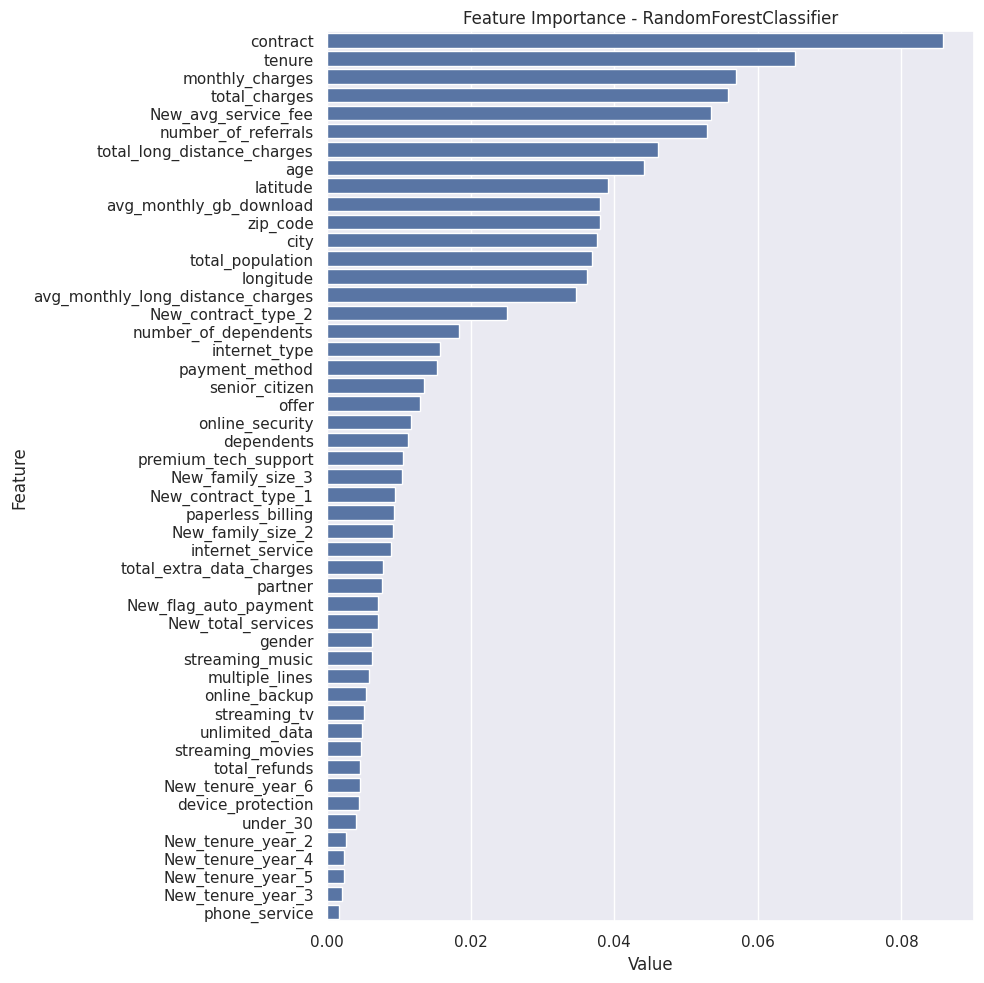

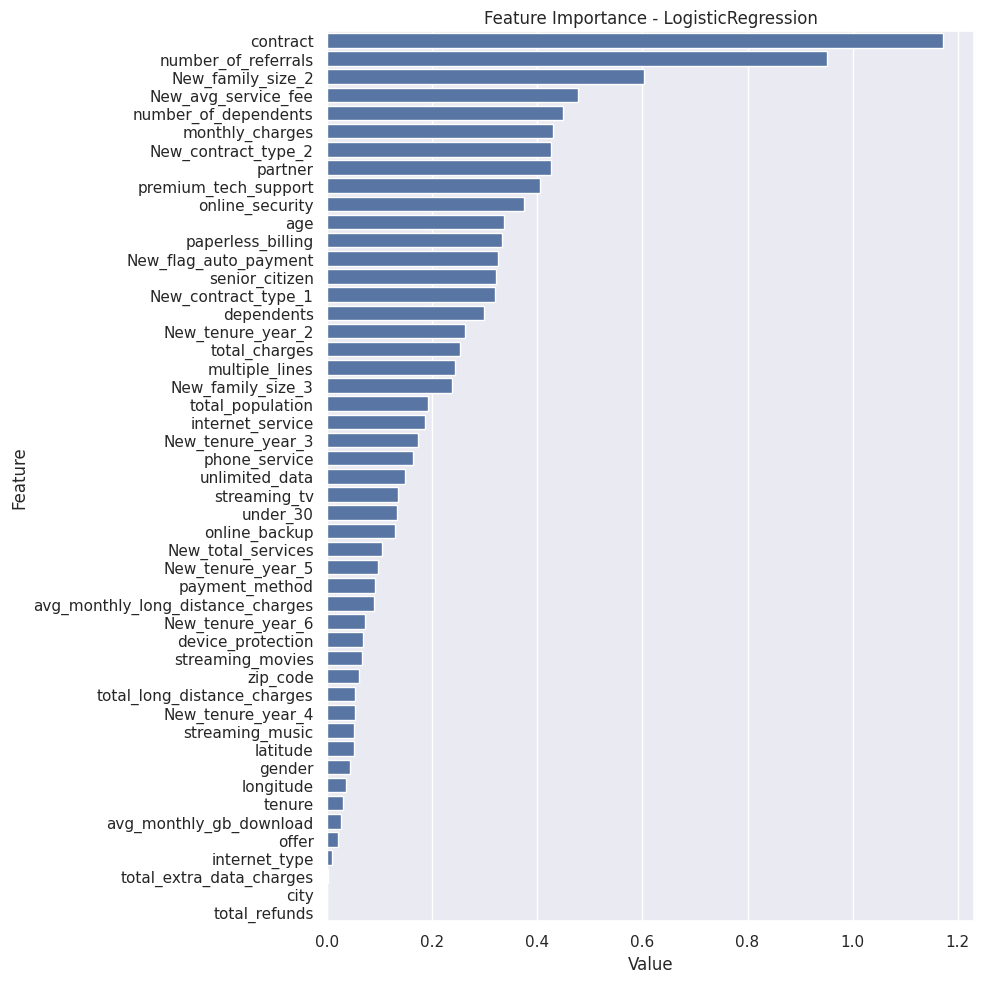

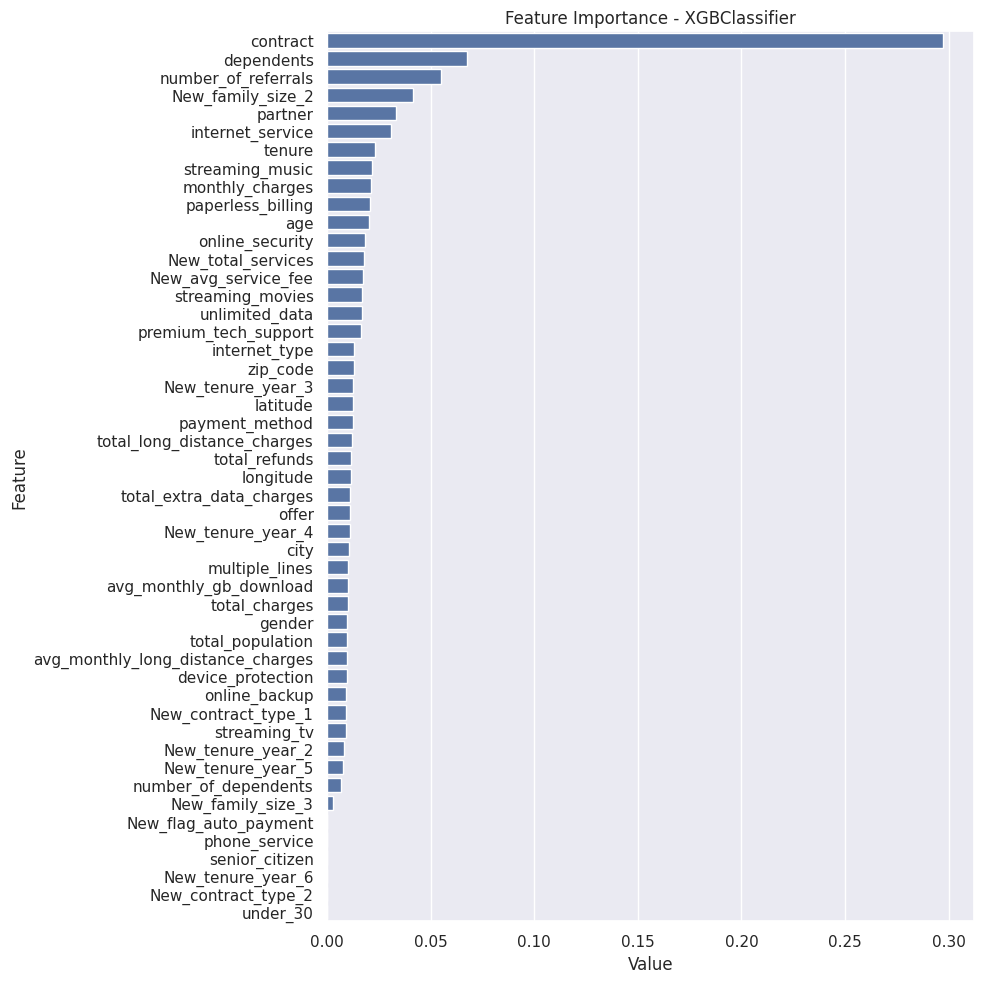

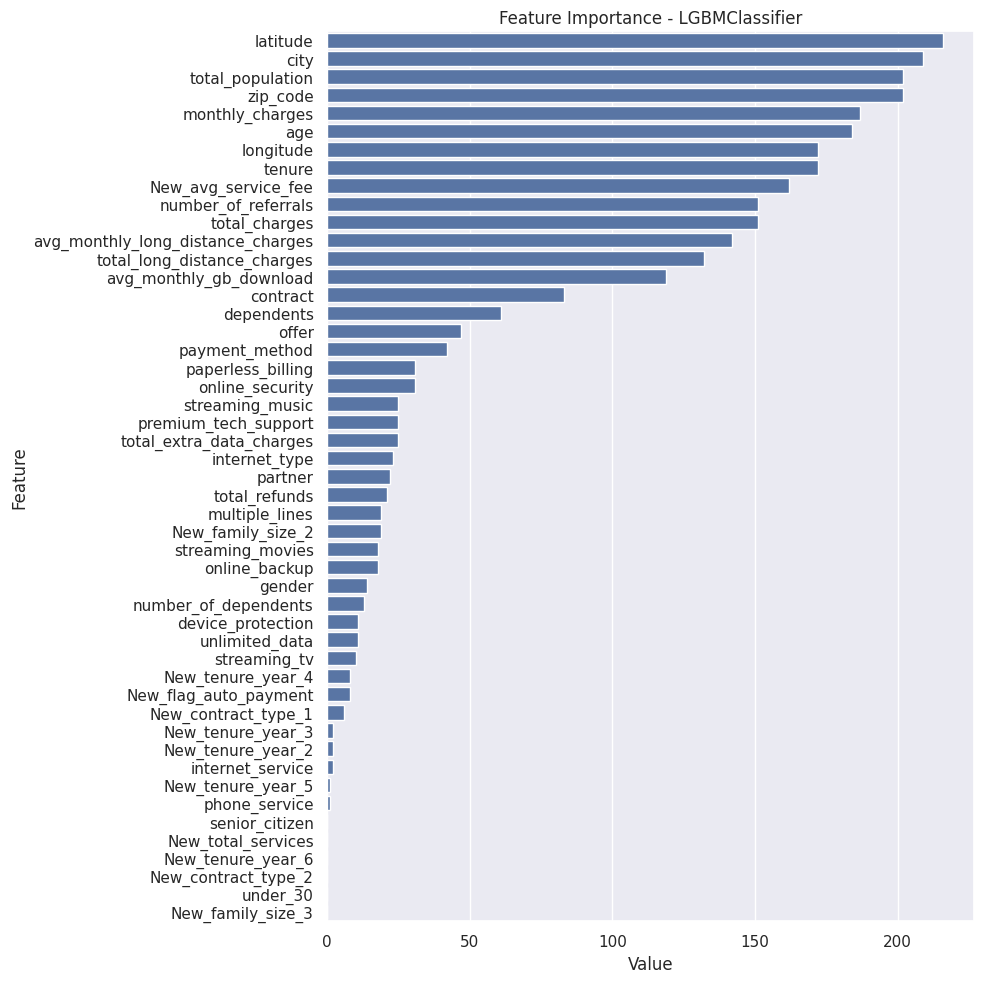

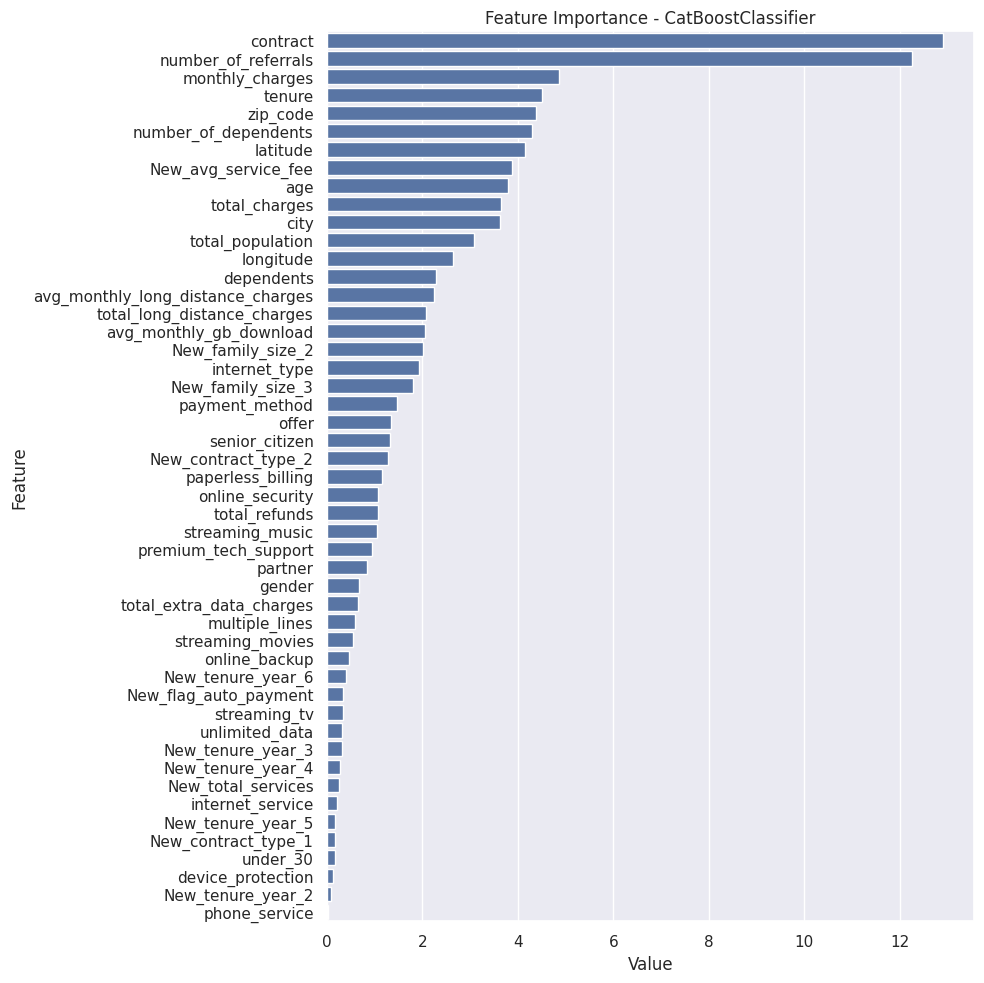

In [ ]:
def plot_importance(model, features, num=None, save=False):

    if num is None:
        num = len(features.columns)


    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):

        importances = model.coef_[0] if model.coef_.ndim == 2 else model.coef_
        importances = np.abs(importances)
    else:
        print(f"{model.__class__.__name__} modelinde özellik önem değerleri bulunamadı.")
        return

    feature_imp = pd.DataFrame({'Value': importances, 'Feature': features.columns})

    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature",
                data=feature_imp.sort_values(by="Value", ascending=False).iloc[:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')
    plt.show()


models = [RandomForestClassifier(),
          LogisticRegression(),
          XGBClassifier(),
          LGBMClassifier(),
          CatBoostClassifier(verbose=False, random_state=12345)
         ]

for model in models:
    model.fit(X, y)
    plot_importance(model, X)

## 23. Comparison of Metrics for Different Models After Feature Engineering

In [ ]:
base_metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [base_models_metrics[0]['Accuracy'], base_models_metrics[1]['Accuracy'],
                 base_models_metrics[2]['Accuracy'], base_models_metrics[3]['Accuracy'],
                 base_models_metrics[4]['Accuracy'], base_models_metrics[5]['Accuracy'],
                 base_models_metrics[6]['Accuracy']],
    "AUC": [base_models_metrics[0]['AUC'], base_models_metrics[1]['AUC'],
            base_models_metrics[2]['AUC'], base_models_metrics[3]['AUC'],
            base_models_metrics[4]['AUC'], base_models_metrics[5]['AUC'],
            base_models_metrics[6]['AUC']],
    "Recall": [base_models_metrics[0]['Recall'], base_models_metrics[1]['Recall'],
               base_models_metrics[2]['Recall'], base_models_metrics[3]['Recall'],
               base_models_metrics[4]['Recall'], base_models_metrics[5]['Recall'],
               base_models_metrics[6]['Recall']],
    "Precision": [base_models_metrics[0]['Precision'], base_models_metrics[1]['Precision'],
                  base_models_metrics[2]['Precision'], base_models_metrics[3]['Precision'],
                  base_models_metrics[4]['Precision'], base_models_metrics[5]['Precision'],
                  base_models_metrics[6]['Precision']],
    "F1": [base_models_metrics[0]['F1'], base_models_metrics[1]['F1'],
           base_models_metrics[2]['F1'], base_models_metrics[3]['F1'],
           base_models_metrics[4]['F1'], base_models_metrics[5]['F1'],
           base_models_metrics[6]['F1']]
}

last_metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy'],
                 last_models_metrics[6]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC'],
            last_models_metrics[6]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall'],
               last_models_metrics[6]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision'],
                  last_models_metrics[6]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1'],
           last_models_metrics[6]['F1']]
}

# Creating DataFrames from the metric dictionaries
base_results_df = pd.DataFrame(base_metrics)
last_results_df = pd.DataFrame(last_metrics)

# Calculating the improvement percentages for each metric
improvement_df = pd.DataFrame()
improvement_df["Model"] = base_results_df["Model"]
improvement_df["Accuracy"] = ((last_results_df["Accuracy"] - base_results_df["Accuracy"]) / base_results_df["Accuracy"]) * 100
improvement_df["AUC"] = ((last_results_df["AUC"] - base_results_df["AUC"]) / base_results_df["AUC"]) * 100
improvement_df["Recall"] = ((last_results_df["Recall"] - base_results_df["Recall"]) / base_results_df["Recall"]) * 100
improvement_df["Precision"] = ((last_results_df["Precision"] - base_results_df["Precision"]) / base_results_df["Precision"]) * 100
improvement_df["F1"] = ((last_results_df["F1"] - base_results_df["F1"]) / base_results_df["F1"]) * 100

# Sorting the DataFrame by accuracy improvement in descending order
improvement_df = improvement_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=improvement_df["Model"],
        y=improvement_df[metric],
        marker_color=color,
        name=metric,
        text=improvement_df[metric].apply(lambda x: f"{round(x, 2)}%"),
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Improvement Percentage",
    title="Metric Improvement Comparison After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

## 24.Hyperparameter Optimization

In [ ]:
lr_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knn_params = {"n_neighbors": [3, 5, 7]}
cart_params = {"max_depth": [3, 5, 7]}
rf_params = {"n_estimators": [100, 300, 500]}
xgb_params = {"learning_rate": [0.01, 0.1], "max_depth": [3, 5, 7]}
lgbm_params = {"learning_rate": [0.01, 0.1], "n_estimators": [100, 300, 500]}
catboost_params = {"iterations": [200, 500], "learning_rate": [0.01, 0.1], "depth": [3, 6]}

classifiers = [
    ("LR", LogisticRegression(), lr_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("CART", DecisionTreeClassifier(), cart_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("XGB", XGBClassifier(), xgb_params),
    ("LGBM", LGBMClassifier(verbose=-1), lgbm_params),
    ("CatBoost", CatBoostClassifier(verbose=False), catboost_params)
]

def hyperparameter_optimization(X, y, cv=5, scoring="accuracy"):
    print("Hyperparameter Optimization")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} #########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X,y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After) : {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models, final_model

best_models, final_model = hyperparameter_optimization(X, y)

Hyperparameter Optimization
########## LR #########
accuracy (Before): 0.8387
accuracy (After) : 0.839
LR best params: {'C': 1000}

########## KNN #########
accuracy (Before): 0.741
accuracy (After) : 0.7473
KNN best params: {'n_neighbors': 7}

########## CART #########
accuracy (Before): 0.7816
accuracy (After) : 0.8156
CART best params: {'max_depth': 7}

########## RF #########
accuracy (Before): 0.84
accuracy (After) : 0.8421
RF best params: {'n_estimators': 300}

########## XGB #########
accuracy (Before): 0.8475
accuracy (After) : 0.8543
XGB best params: {'learning_rate': 0.1, 'max_depth': 3}

########## LGBM #########
accuracy (Before): 0.8478
accuracy (After) : 0.8528
LGBM best params: {'learning_rate': 0.01, 'n_estimators': 500}

########## CatBoost #########
accuracy (Before): 0.858
accuracy (After) : 0.8557
CatBoost best params: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}



In [ ]:
final_model

## 25. Final Model

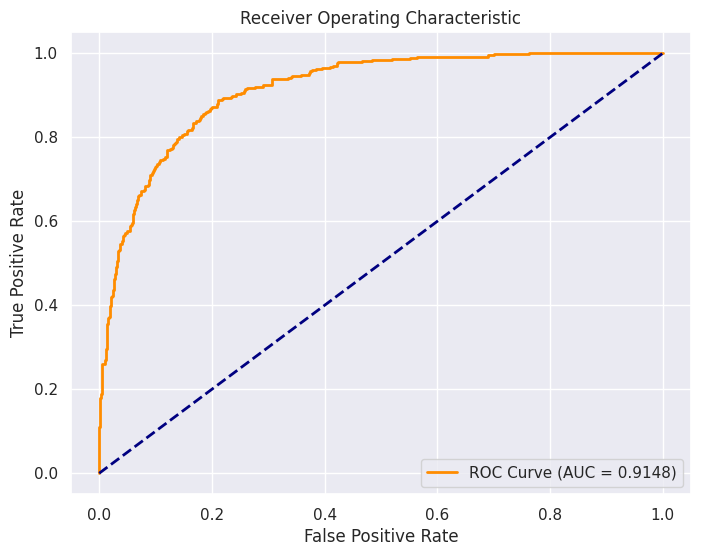

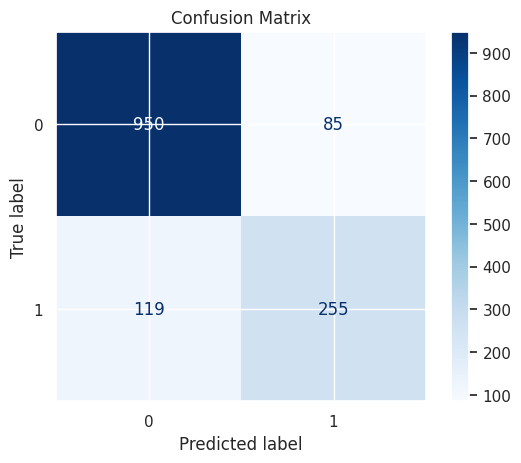

Final Model Performance on Test Set
-------------------------------------
Accuracy : 0.8552
Recall   : 0.6818
Precision: 0.7500
F1 Score : 0.7143
AUC      : 0.9148


In [ ]:
from sklearn.metrics import roc_curve, auc as calc_auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# We retrain the final model with training data
final_model.fit(X_train, y_train)

# Predictions
y_final_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = calc_auc(fpr, tpr)

# ROC Curve Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC Curve (AUC = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Performance metrics
accuracy = accuracy_score(y_test, y_final_pred)
recall = recall_score(y_test, y_final_pred)
precision = precision_score(y_test, y_final_pred)
f1 = f1_score(y_test, y_final_pred)
auc_score = roc_auc_score(y_test, y_proba)

print("Final Model Performance on Test Set")
print("-------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc_score:.4f}")

## 26. Fine tune for Recall

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


# Updated hyperparameter ranges
lr_params = {"C": np.logspace(-4, 4, 20), "penalty": ["l1", "l2"], "solver": ["liblinear"]}
knn_params = {"n_neighbors": np.arange(3, 30, 2), "weights": ["uniform", "distance"]}
cart_params = {"max_depth": np.arange(3, 15), "min_samples_split": [2, 5, 10]}
rf_params = {"n_estimators": [200, 400, 600], "max_depth": [5, 10, None], "min_samples_split": [2, 5]}
xgb_params = {"learning_rate": [0.001, 0.01, 0.1], "max_depth": [3, 5, 7], "gamma": [0, 0.1, 0.2]}
#lgbm_params = {"learning_rate": [0.001, 0.01], "n_estimators": [400, 600], "num_leaves": [31, 63]}
catboost_params = {"iterations": [500, 1000], "learning_rate": [0.001, 0.01], "depth": [3, 6]}

classifiers = [
    ("LR", LogisticRegression(), lr_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("CART", DecisionTreeClassifier(), cart_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("XGB", XGBClassifier(eval_metric='logloss'), xgb_params),
    #("LGBM", LGBMClassifier(verbose=-1), lgbm_params),
    ("CatBoost", CatBoostClassifier(verbose=False), catboost_params)
]

def optimized_hyperparameter_tuning(X_train, y_train):
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"\n🔍 {name} Hyperparameter Optimization...")

        # Recall
        search = RandomizedSearchCV(
            classifier, params,
            n_iter=20,
            scoring='recall',
            cv=5,
            n_jobs=-1,
            random_state=42
        ).fit(X_train, y_train)

        best_model = search.best_estimator_
        best_models[name] = best_model

        print(f"🏆 Best params: {search.best_params_}")
        print(f"✅ Best Recall (CV): {search.best_score_:.4f}")

    return best_models

best_models = optimized_hyperparameter_tuning(X_train, y_train)

# Threshold optimization
def find_optimal_threshold(model, X_val, y_val):
    y_proba = model.predict_proba(X_val)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)

    # Threshold that maximizes F1 score
    f1_scores = 2*(precision*recall)/(precision+recall+1e-9)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    return optimal_threshold

# Choose The Best Model
final_model = best_models['CatBoost']

# Optimal threshold
optimal_threshold = find_optimal_threshold(final_model, X_train, y_train)

# Predictions on the test set
y_proba = final_model.predict_proba(X_test)[:,1]
y_final_pred = (y_proba >= optimal_threshold).astype(int)

# Performance metrics
print("\n📊 Final Model Performance (Optimized Threshold)")
print(classification_report(y_test, y_final_pred))
print(f"🎯 Optimal Threshold: {optimal_threshold:.4f}")


🔍 LR Hyperparameter Optimization...
🏆 Best params: {'solver': 'liblinear', 'penalty': 'l1', 'C': 29.763514416313132}
✅ Best Recall (CV): 0.6702

🔍 KNN Hyperparameter Optimization...
🏆 Best params: {'weights': 'distance', 'n_neighbors': 3}
✅ Best Recall (CV): 0.4268

🔍 CART Hyperparameter Optimization...
🏆 Best params: {'min_samples_split': 5, 'max_depth': 4}
✅ Best Recall (CV): 0.6314

🔍 RF Hyperparameter Optimization...
🏆 Best params: {'n_estimators': 600, 'min_samples_split': 5, 'max_depth': 10}
✅ Best Recall (CV): 0.6455

🔍 XGB Hyperparameter Optimization...
🏆 Best params: {'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1}
✅ Best Recall (CV): 0.6783

🔍 CatBoost Hyperparameter Optimization...
🏆 Best params: {'learning_rate': 0.01, 'iterations': 1000, 'depth': 6}
✅ Best Recall (CV): 0.6676

📊 Final Model Performance (Optimized Threshold)
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1035
           1       0.68      0.79    

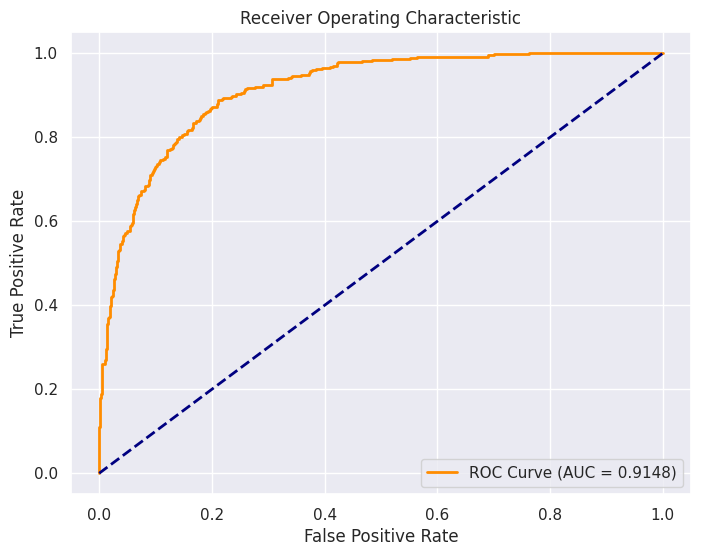

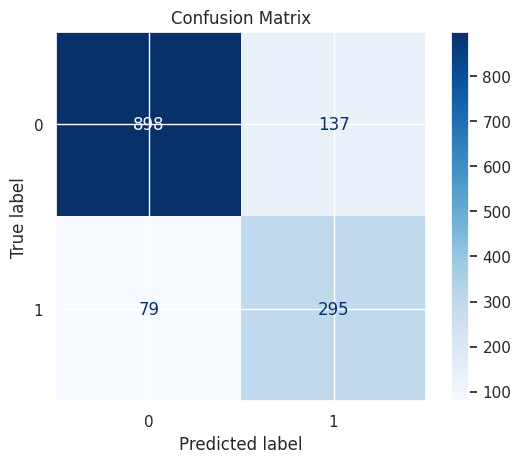

Final Model Performance on Test Set
-------------------------------------
Accuracy : 0.8467
Recall   : 0.7888
Precision: 0.6829
F1 Score : 0.7320
AUC      : 0.9131


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC Curve (AUC = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Confussion matrix
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Performance metrics
accuracy = accuracy_score(y_test, y_final_pred)
recall = recall_score(y_test, y_final_pred)
precision = precision_score(y_test, y_final_pred)
f1 = f1_score(y_test, y_final_pred)
auc_score = roc_auc_score(y_test, y_proba)

print("Final Model Performance on Test Set")
print("-------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc_score:.4f}")

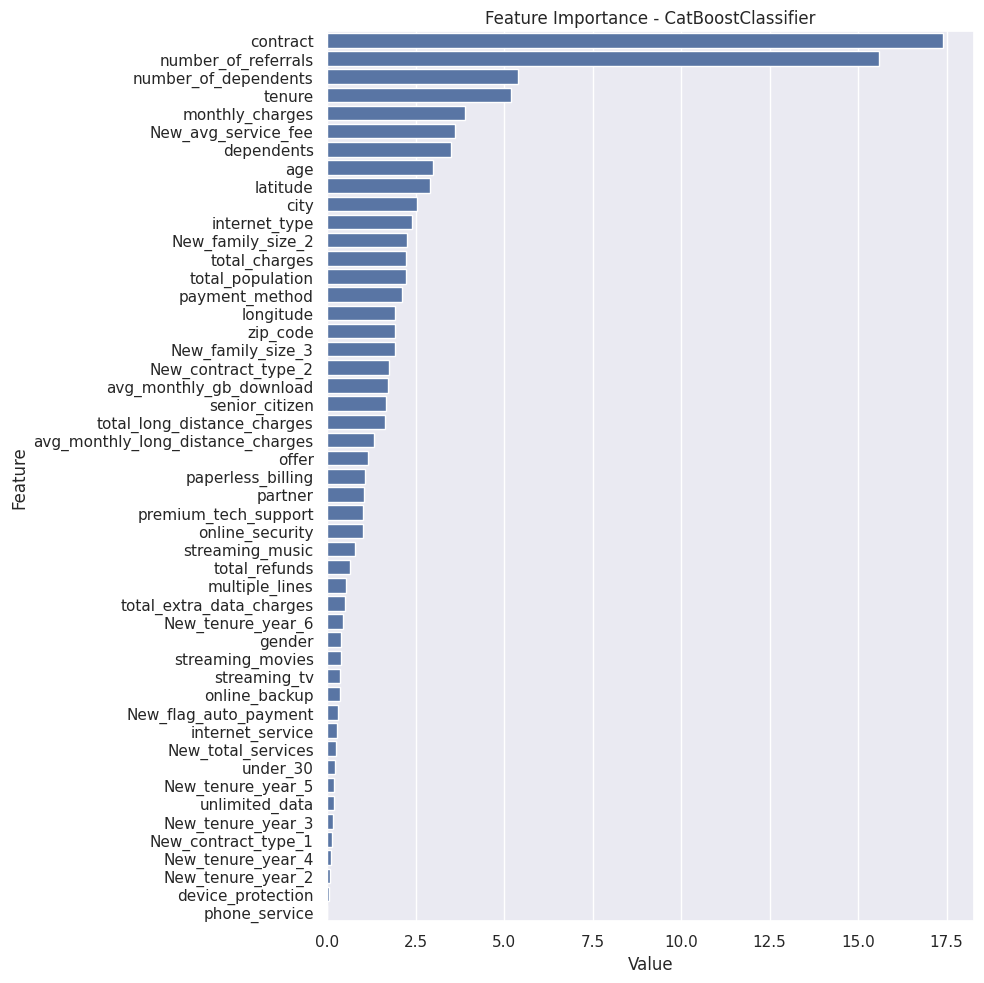

In [ ]:
plot_importance(final_model, X_train)

In [ ]:
X_train

gender    age  under_30  senior_citizen  partner  dependents  number_of_dependents  tenure  \
3793       0 -0.071         0               0        1           0                 0.000      60   
3192       1 -0.071         0               0        0           1                 3.000      12   
4922       0 -0.393         0               0        0           0                 0.000       2   
3926       1 -0.393         0               0        1           0                 0.000      33   
3859       0  0.250         0               0        0           1                 1.000      14   
...      ...    ...       ...             ...      ...         ...                   ...     ...   
6331       0  0.107         0               0        1           1                 2.000      22   
6146       0 -0.750         1               0        1           0                 0.000      42   
4485       1  0.107         0               0        0           0                 0.000      20   
2739       0 -0.143         0               0        1           1                 3.000      24   
5679       0  0.214         0               0        0           0                 0.000      10   

      internet_service  phone_service  multiple_lines  avg_monthly_gb_download  unlimited_data  \
3793                 1              1               1                    0.083               1   
3192                 0              1               0                   -0.708               0   
4922                 1              1               0                    0.333               1   
3926                 1              1               0                    0.542               1   
3859                 1              1               1                    0.208               1   
...                ...            ...             ...                      ...             ...   
6331                 0              1               0                   -0.708               0   
6146                 1              1               1                    0.417               1   
4485                 1              1               1                    0.333               1   
2739                 0              1               1                   -0.708               0   
5679                 0              1               0                   -0.708               0   

      offer  number_of_referrals  online_security  online_backup  device_protection  \
3793      2                2.667                1              1                  0   
3192      4                0.000                0              0                  0   
4922      0                0.000                1              0                  1   
3926      3                2.333                1              0                  1   
3859      4                0.000                1              0                  0   
...     ...                  ...              ...            ...                ...   
6331      0                2.667                0              0                  0   
6146      0                0.333                0              0                  0   
4485      4                0.000                0              0                  0   
2739      0                2.333                0              0                  0   
5679      0                0.000                0              0                  0   

      premium_tech_support  streaming_tv  streaming_movies  streaming_music  internet_type  \
3793                     0             0                 1                1              2   
3192                     0             0                 0                0              3   
4922                     0             0                 0                0              2   
3926                     0             1                 1                1              0   
3859                     1             0                 0                0              2   
...                

In [ ]:
import joblib

# Lưu mô hình CatBoost vào file
joblib.dump(final_model, 'catboost_model_ml.pkl')

print("Mô hình đã được lưu thành công vào file 'catboost_model_ml.pkl'")

Mô hình đã được lưu thành công vào file 'catboost_model_ml.pkl'


In [ ]:
survival_df = df.copy()
survival_df.to_csv('survival_df1.csv', index=False)

## 27. Ready for Survival Analysis

In [ ]:
# Xuất file CSV đầy đủ cho tập train:
train_df = X_train.copy()
train_df['churn_value'] = y_train
train_df.to_csv('train_survival.csv', index=False)

# Xuất file CSV đầy đủ cho tập test:
test_df = X_test.copy()
test_df['churn_value'] = y_test
test_df.to_csv('test_survival.csv', index=False)
